# Module 4 - Project

#### _Name - Callum Ballard_

#### _Instructor - Jeff Herman_

#### _Course - Online Data Science (PT)_



In this project, we will consult for a property investor, and advise on American regions that they should invest in in. We will isolate a group of the most promising regions, then run forecasting analysis to pinpoint those regions with the very best potential.


## 1) Bring In Required Libraries
Import the libraries we'll need for this project, and define our visualisation preferences.

In [1]:
#For the initial data exploration
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta

#For data visualisation
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.font_manager
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from matplotlib.pylab import rcParams

#For the time series modelling
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#Suppress warnings from showing
import warnings
warnings.filterwarnings('ignore')

#Allow ourselves to save models
import pickle

In [72]:
#Define colours for the visuals
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'

CB91_BlueL = '#ABE5FF'
CB91_GreenL = '#B5F1EB'
CB91_PinkL = '#FAD9FA'
CB91_PurpleL = '#D9A8EB'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#F9D094'


#The following gradients will be used for heatmaps, etc
CB91_Grad_BP = ['#2CBDFE', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

CB91_Grad_BA = ['#2cbdfe', '#31bdf9', '#36bcf5', '#3bbcf0',
                '#41bcec', '#46bbe7', '#4bbbe3', '#50bbde',
                '#55bbd9', '#5abad5', '#60bad0', '#65bacc',
                '#6ab9c7', '#6fb9c3', '#74b9be', '#79b8ba',
                '#7eb8b5', '#84b8b0', '#89b7ac', '#8eb7a7',
                '#93b7a3', '#98b79e', '#9db69a', '#a3b695',
                '#a8b690', '#adb58c', '#b2b587', '#b7b583',
                '#bcb47e', '#c1b47a', '#c7b475', '#ccb371',
                '#d1b36c', '#d6b367', '#dbb363', '#e0b25e',
                '#e6b25a', '#ebb255', '#f0b151', '#f5b14c']

CB91_Grad_AP = ['#f5b14c', '#f3ae4f', '#f0aa52', '#eea755',
                '#eca458', '#eaa05c', '#e79d5f', '#e59962',
                '#e39665', '#e19368', '#de8f6b', '#dc8c6e',
                '#da8971', '#d88574', '#d58277', '#d37f7b',
                '#d17b7e', '#cf7881', '#cc7584', '#ca7187',
                '#c86e8a', '#c66a8d', '#c36790', '#c16493',
                '#bf6096', '#bd5d9a', '#ba5a9d', '#b856a0',
                '#b653a3', '#b450a6', '#b14ca9', '#af49ac',
                '#ad46af', '#ab42b2', '#a83fb5', '#a63bb9',
                '#a438bc', '#a235bf', '#9f31c2', '#9d2ec5']

CB91_Grad_GP = ['#47dbcd', '#4bd9ce', '#50d8cf', '#54d6d0',
                '#59d5d1', '#5dd3d2', '#61d2d3', '#66d0d4',
                '#6acfd5', '#6fcdd6', '#73ccd6', '#78cad7',
                '#7cc9d8', '#80c7d9', '#85c6da', '#89c4db',
                '#8ec3dc', '#92c1dd', '#96c0de', '#9bbedf',
                '#9fbde0', '#a4bbe1', '#a8bae2', '#acb8e3',
                '#b1b7e4', '#b5b5e5', '#bab4e6', '#beb2e7',
                '#c2b1e8', '#c7afe9', '#cbaee9', '#d0acea',
                '#d4abeb', '#d9a9ec', '#dda8ed', '#e1a6ee',
                '#e6a5ef', '#eaa3f0', '#efa2f1', '#f3a0f2']


#A list that we'll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink,
              CB91_Violet, CB91_BlueD, CB91_GreenD, CB91_Purple,
              CB91_BlueL, CB91_GreenL, CB91_AmberL, CB91_PinkL,
              CB91_VioletL, CB91_AmberD, CB91_PinkD, CB91_VioletD]


#Use seaborn to set all the default chart visual settings
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":16})

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

## 2) Data Pre-Processing
We bring in the zillow dataset, filling in all instances where the Metro area is unknown.

In [3]:
df = pd.read_csv('Data/zillow_data.csv')
df['Metro'].fillna('Not Applicable', inplace=True)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


We note that just over 1,000 regions do not have full price data (though all have it from about mid-2014).

As we will see later, April 2007 was a critical time in the USA housing market (it was the peak before the recession, when house prices nationwide fell dramatically). We will want full data after this time period at least, therefore we should aim to delete any regions that do not have full data after April 2007.

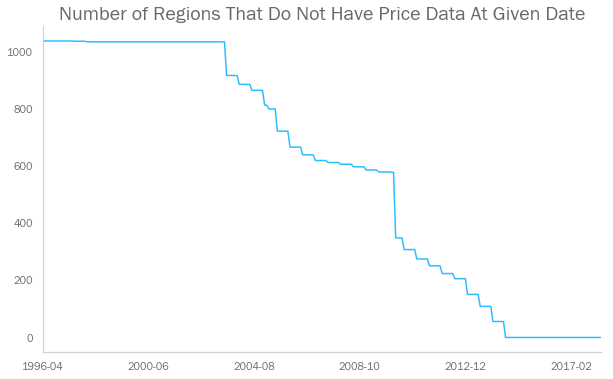

In [4]:
plt.figure(figsize=(10,6))
df.iloc[:,7:].isna().sum().plot();
plt.title('Number of Regions That Do Not Have Price Data At Given Date');

In [5]:
#df.columns[139:] represents the months of April'07 onwards...
df.dropna(inplace=True, subset=list(df.columns[139:]))

Here, we simply convert the columns to datetime format where relevant. This will help later on.

In [6]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

df.columns = list(df.columns[:7]) + list(get_datetimes(df))

Bring in a dataframe of states. This will contain the geometry of each state, so we can plot maps later on.

In [7]:
df_states = gpd.read_file("./States/states.shp")

#Change map projection
df_states = df_states.to_crs(epsg=3395)

#Get the states in alphabetical order and set index
df_states = df_states.sort_values('STATE_ABBR')
df_states.set_index('STATE_ABBR', inplace=True)

## Step 3: EDA and Visualization
Let's dig into the data and see what trends and quirks we can find. Firstly, we define a couple of functions that will help us to map colour-coded heatmaps of the country by state.

In [8]:
def gradient_mapper(kpi,grad):
    
    '''
    Takes a list/series of numbers, outputs a list of hex colours,
    appropriate for heatmapping the initial data.
    
    Parameters:
    - col (list/series, etc.): The data to be transformed
    - grad (list hex codes): A list of colors that the data will be transformed to
    
    '''
    #Define the lowest and the highest points in the dataset
    kpi_min = kpi.min()
    kpi_max = kpi.max()

    #Work out how many colours we have in the given gradient
    colors = len(grad)-1
    
    #Transform the data to integers between zero and the length of the gradient list
    first_map = list(map(lambda x: int(round(colors*(x-kpi_min) /
                                             (kpi_max-kpi_min),0)), list(kpi)))
    
    #Map the integers onto the gradient list
    return list(map(lambda x: grad[x], first_map))



def state_map(kpi, grad, states = list(df_states.index), annot=True,
              pacific=True, dc=True, size=30, cb=True):
    
    '''
    Create a visual map of states, with a color gradient based on their
    value for a given KPI.
    
    Parameters:
    - kpi (str): The column name that we will use to color the map.
                 Must be a column heading in df_states. 
    - grad (list): The color gradient that we will use color the map
    - states (list): A list of state codes that we want to map
    - annot (bool): Whether or not we want to write the state name and
                    kpi value on the map
    - pacific (bool): If True, also draw Hawaii and Alaska
    - size (float): Set the width of the plot (the height will auto-adjust)
    - cb (bool): Set whether or not to include a color bar
    
    '''
   
    #Declare a temporary dataframe. This will contain the state abbrebiations
    #as an index, as well as the geometry of each state, the kpi values...
    df_temp = df_states.loc[states,['geometry',kpi]]
    
    #Drop states if we need to
    df_temp = df_temp.dropna()
    
    #Declare local varaibles for pacific and mainland states
    pacific_states = ['AK','HI']
    mainland_states = list(filter(lambda x: x not in pacific_states,
                              list(df_temp.index)))
    
    if dc == False and dc in states:
        df_temp = df_temp.drop('DC')
        mainland_states.remove('DC')
        
    if pacific == False and 'HI' in states and 'AK' in states:
        df_temp = df_temp.drop(['HI','AK'])
    
    #... and the color gradient that we assign with the gradient mapper
    df_temp['Colors'] = gradient_mapper(kpi=df_temp[kpi],grad=grad)
        
    #declare a figure and axes
    fig, ax = plt.subplots(figsize=(size,size/2))
    
    #consider the mainland states first, plotting them in turn
    for i in mainland_states:
        df_temp.loc[[i]].plot(ax=ax, color=df_temp.loc[i,'Colors'])
                
        #if we are annotating...
        if annot == True:
            
            #locate the centre of each state...
            centroid = df_temp.loc[[i]].centroid
            
            #and plot the text there
            plt.annotate(s=f'{round(df_temp.loc[i,kpi],1)}',
                 xy=(centroid.x[i], centroid.y[i]),
                 horizontalalignment='center',
                 color='white',
                 fontsize=size/2)
            
    #Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    #plot the Pacific states in separate subplots
    if pacific == True:
        if 'AK' in states:
            ax2 = fig.add_subplot(3,6,13)
            df_states.loc[['AK']].plot(ax=ax2,
                                       color=df_temp.loc['AK','Colors'])
            ax2.patch.set_alpha(0)
            ax2.set_xticks([])
            ax2.set_yticks([])
        
        if 'HI' in states:
            ax3 = fig.add_subplot(3,6,14)
            df_states.loc[['HI']].plot(ax=ax3,
                                       color=df_temp.loc['HI','Colors'])
            ax3.patch.set_alpha(0)
            ax3.set_xticks([])
            ax3.set_yticks([])
        
    #plot the colorbar
    if cb == True:        
        cmap = LinearSegmentedColormap.from_list(name= '', colors=grad, N=50)
        ax4 = fig.add_subplot(1,30,30)
        norm = mpl.colors.Normalize(vmin=df_temp[kpi].min(),
                                    vmax=df_temp[kpi].max())
        cb = mpl.colorbar.ColorbarBase(ax4, cmap=cmap,
                                       norm=norm, orientation='vertical')
        
        
    sns.despine(left=True,bottom=True)

Let's store some more data in the state by state dataframe, which we will be able to visualise.

In [9]:
#Number of regions present in each state
df_states['RegionCount'] = df.groupby('State').count()['RegionID']

#The median and mean region value by state
df_states['18-04_median'] = df.groupby(
    'State').median()[pd.to_datetime('2018-04', format='%Y-%m')]

df_states['18-04_mean'] = df.groupby(
    'State').mean()[pd.to_datetime('2018-04', format='%Y-%m')]

We look at the distribution of regions by state.

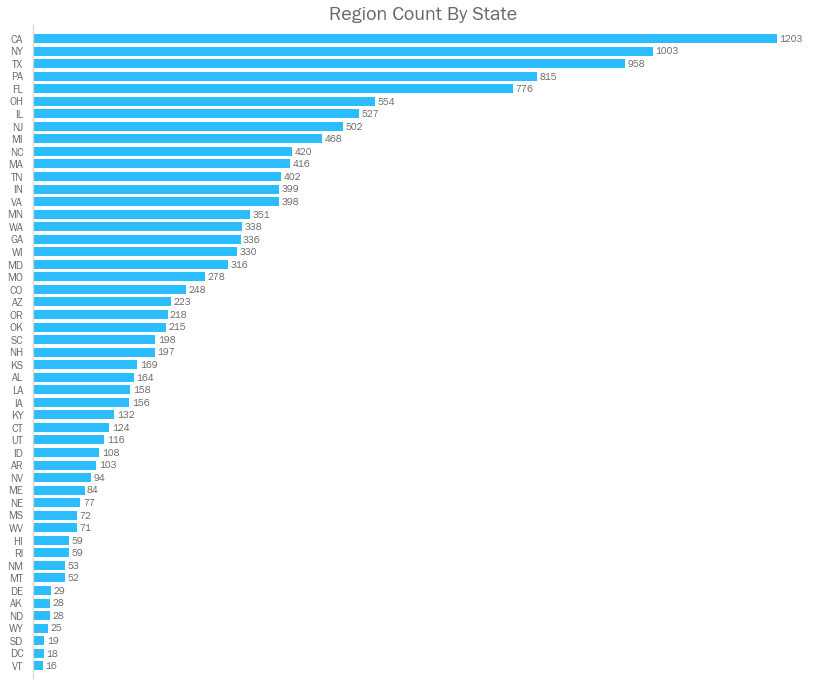

In [10]:
plt.figure(figsize=(14,12))

df_states_ordered = df_states.sort_values('RegionCount')

plt.barh(df_states_ordered.index,df_states_ordered['RegionCount'])

sns.despine(bottom=True)
plt.xticks([])
plt.ylim(-1,51)

plt.title('Region Count By State')

for i, v in enumerate(df_states_ordered['RegionCount']):
    plt.text(v + 4, i - 0.25, str(int(v)), fontsize = 10)

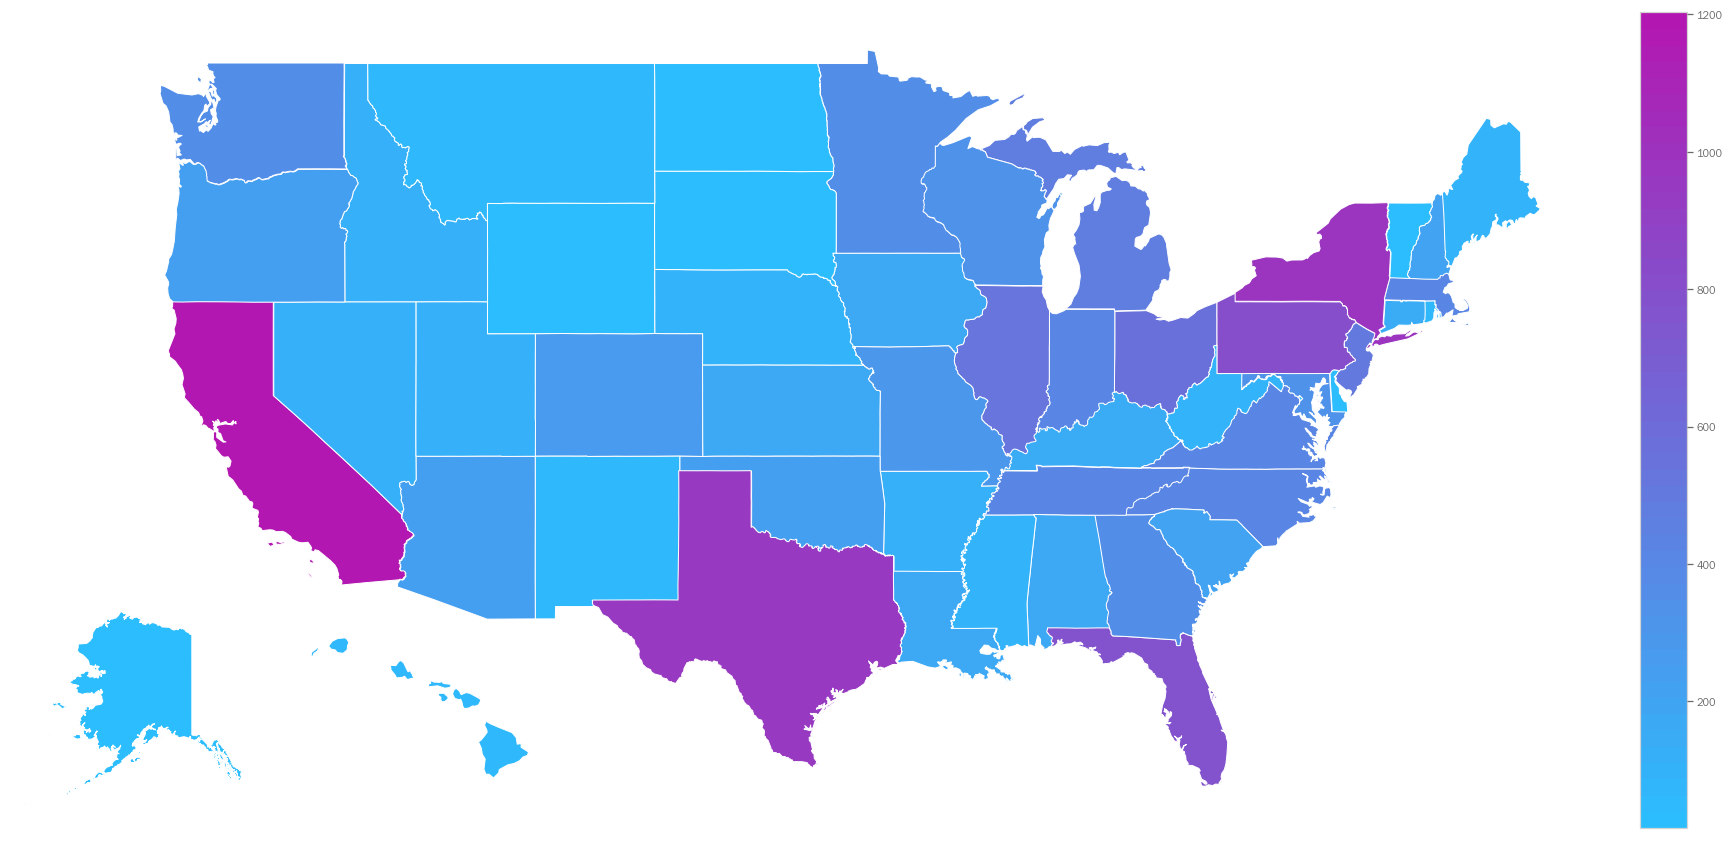

In [67]:
#The same data as a map...
state_map(kpi = 'RegionCount', grad = CB91_Grad_BP, 
          annot=False, pacific=True)

As we would expect, large states like Texas, California, and Florida are amongst the most represented, with densely populated states like New York also up there.

Let's see how house values look on a state by state basis.

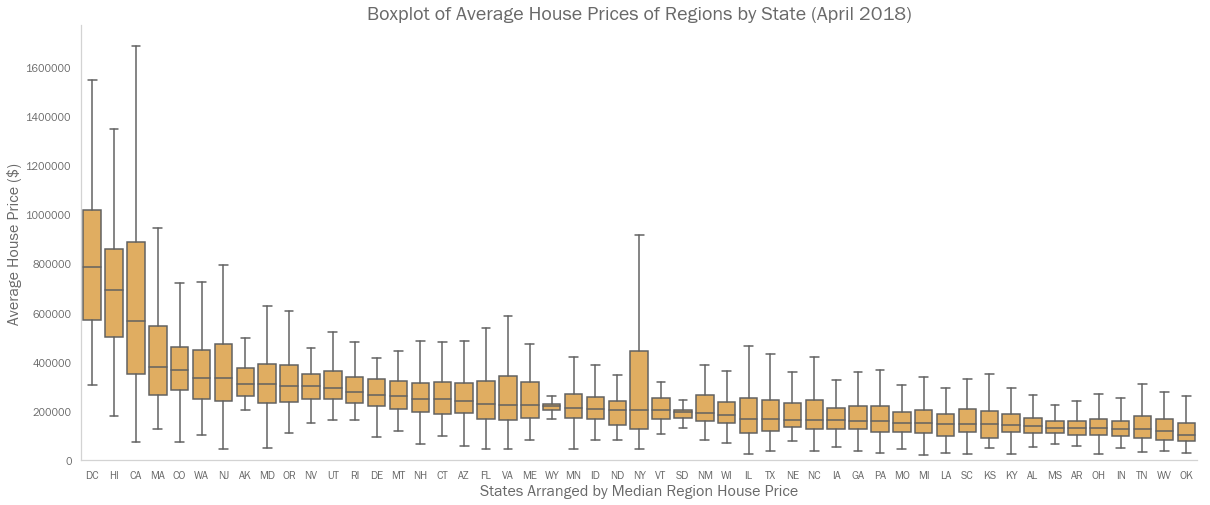

In [12]:
plt.figure(figsize=(20,8))

y = pd.to_datetime('2018-04', format='%Y-%m')

state_order = df_states['18-04_median'].sort_values(ascending=False).index

sns.boxplot(x='State',y=y,
            data=df,order=state_order,
            showfliers=False, color = CB91_Amber)

plt.ylim(0,);
plt.xlabel('States Arranged by Median Region House Price')
plt.ylabel('Average House Price ($)')
plt.title('Boxplot of Average House Prices of Regions by State (April 2018)');

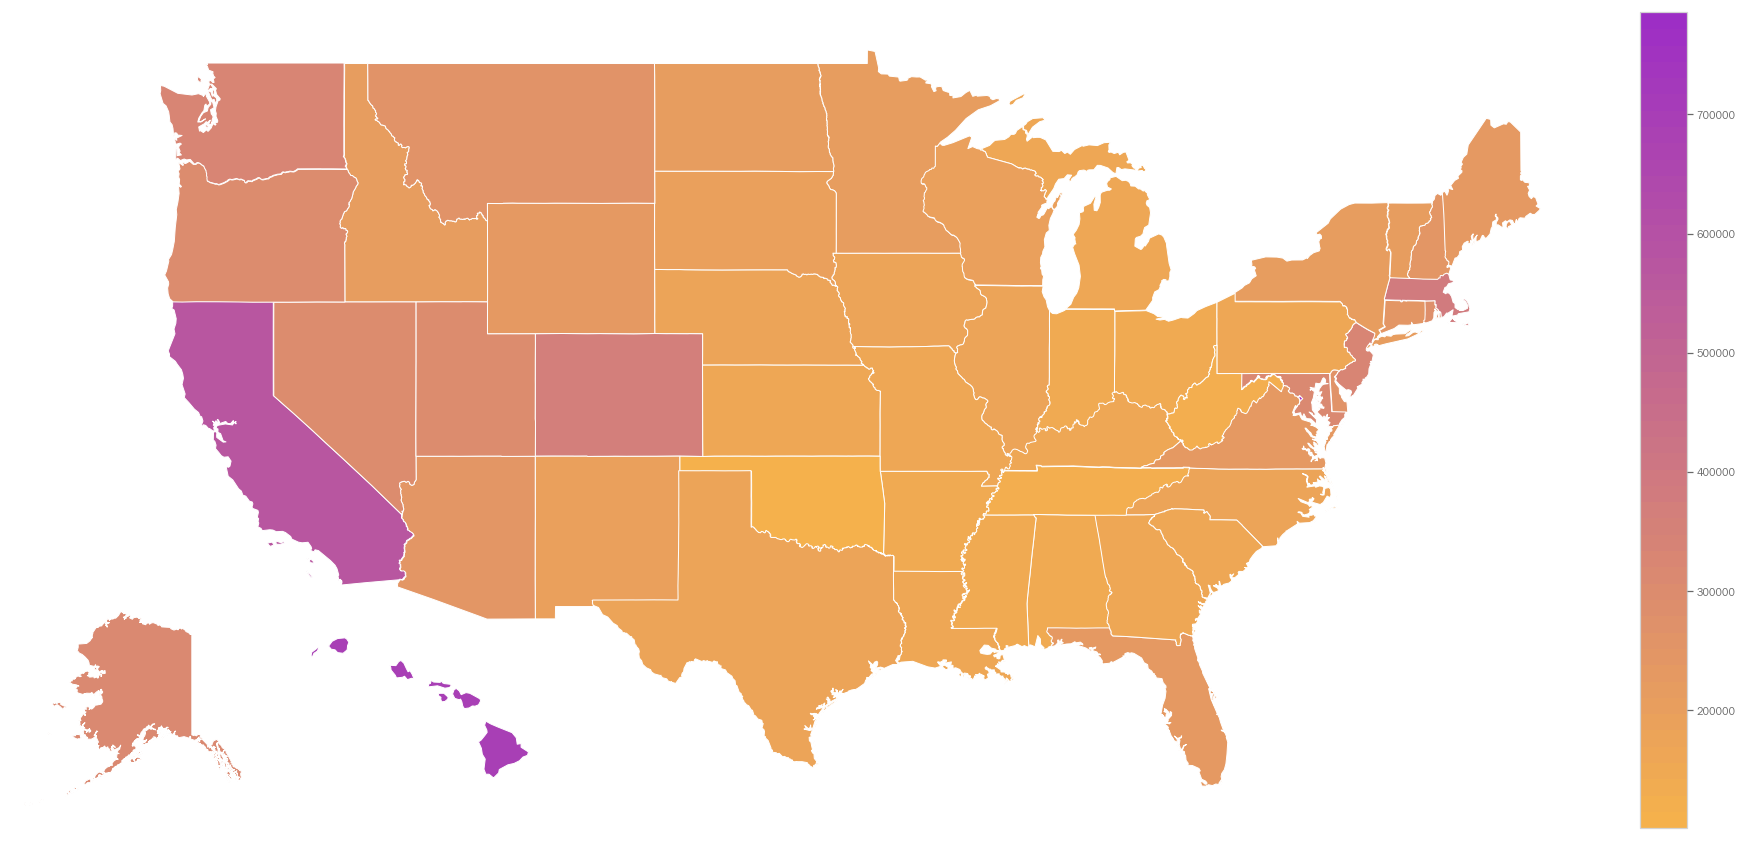

In [13]:
state_map(kpi = '18-04_median', grad = CB91_Grad_AP, annot=False,
          pacific=True, dc=False)

The same map, removing the top-end outliers...

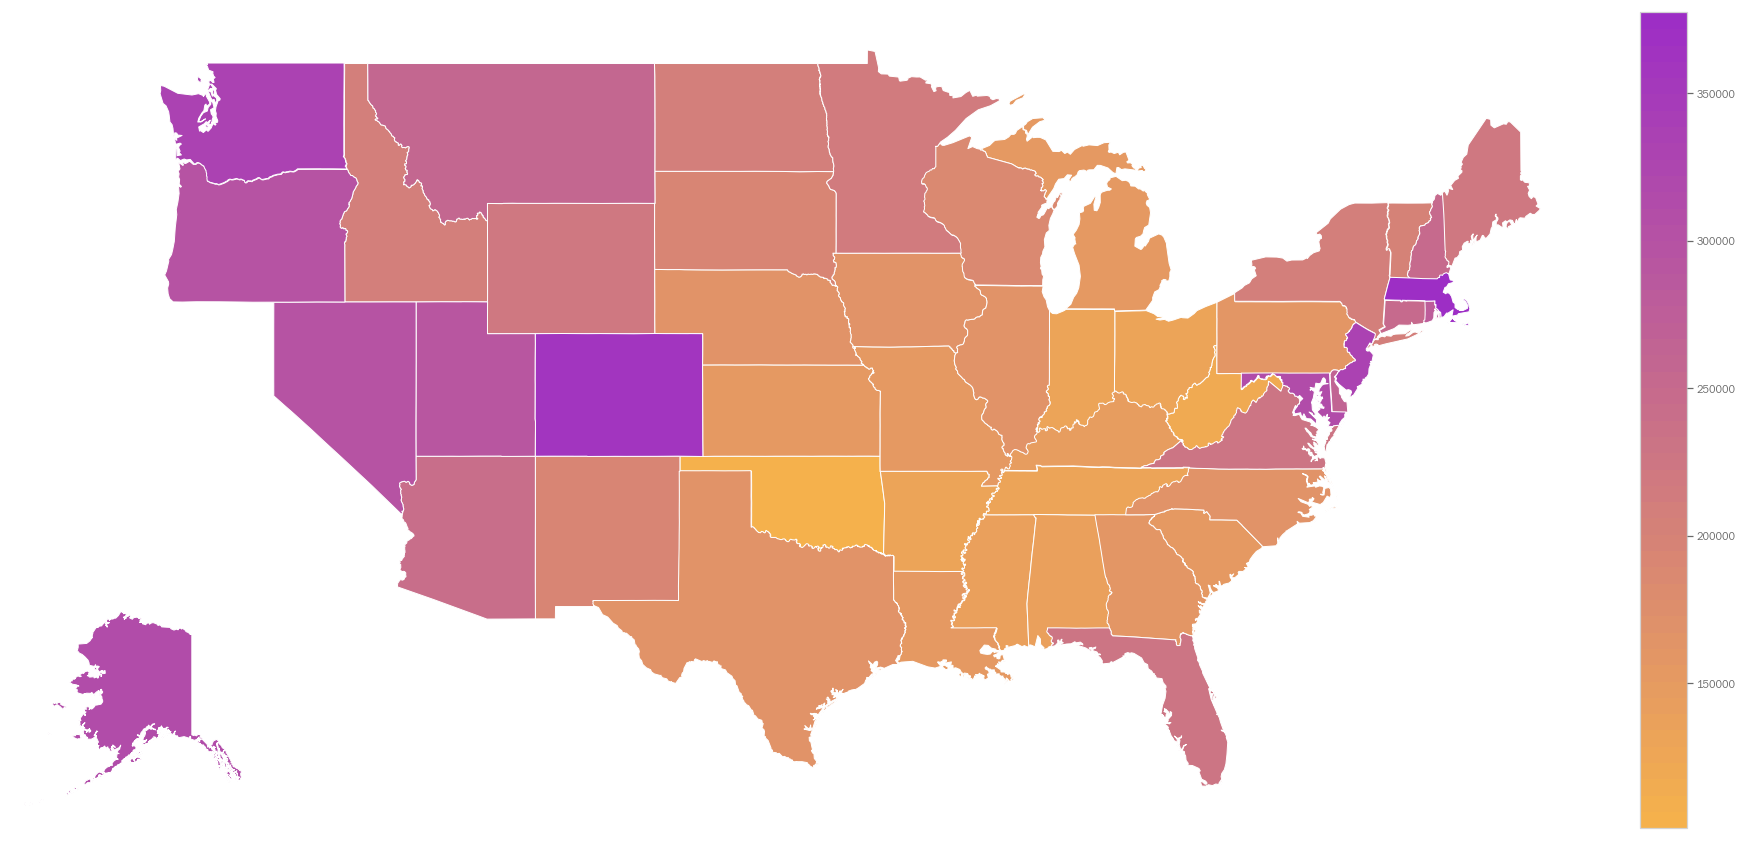

In [14]:
state_map(kpi = '18-04_median',
          states = df_states.sort_values('18-04_median').index[:-3],
          grad = CB91_Grad_AP, annot=False, pacific=True, dc=False)

So there is a wide variation amongst different states - with some big outliers towards the top end. New York also has a wide spread (as we would expect), though its median is almost exactly in the middle of the state distribution.

We create a new dataframe of summary statistics. The aim of this will be to visualise how the average house price has changed in the dataset (we can also have a view of different percentiles, to get a sense of spread).

In [15]:
#Create an empty dataframe...
df_sum = pd.DataFrame()

#And populate with summary statistics
df_sum['Mean'] = df.mean()
df_sum['Min'] = df.min()
df_sum['05%'] = df.quantile(0.05)
df_sum['25%'] = df.quantile(0.25)
df_sum['50%'] = df.quantile(0.5)
df_sum['75%'] = df.quantile(0.75)
df_sum['95%'] = df.quantile(0.95)
df_sum['Max'] = df.max()

#Drop non-date rows, and reset the index
#This is required for matplotlib fill function coming up
df_sum.drop(['RegionID','RegionName','SizeRank'], inplace=True)
df_sum.reset_index(inplace=True)

Plot the summary statistics, showing the median and means as lines, and certain quantile ranges as shaded areas.

In [16]:
df_sum.tail()

,index,Mean,Min,05%,25%,50%,75%,95%,Max
260,2017-12-01,287190.682833,14300,76000.0,133500.0,198600.0,320700.0,758000.0,18307100
261,2018-01-01,288804.481316,14100,76210.0,134100.0,199500.0,322600.0,762090.0,18365900
262,2018-02-01,290560.306318,13900,76700.0,134700.0,200600.0,324350.0,766410.0,18530400
263,2018-03-01,292744.160817,13800,77310.0,135500.0,202400.0,326300.0,771680.0,18337700
264,2018-04-01,294301.481954,13800,77900.0,136200.0,203600.0,328000.0,776740.0,17894900


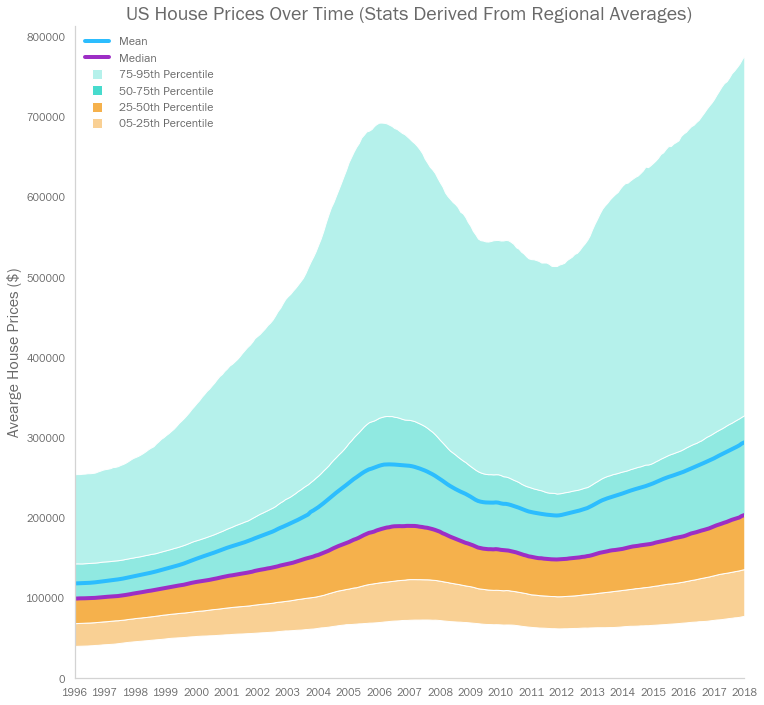

In [79]:
plt.figure(figsize=(12,12))

x = df_sum['index'].dt.to_pydatetime()

plt.plot(x, df_sum['Mean'], lw = 4,
         label = 'Mean House Price')
plt.plot(x, df_sum['50%'], lw = 4,
         label = 'Median House Price', color = CB91_Purple)

plt.fill_between(x, df_sum['05%'], df_sum['25%'],
                 facecolor=CB91_AmberL, interpolate=True)

plt.fill_between(x, df_sum['25%'], df_sum['50%'],
                 facecolor=CB91_Amber, interpolate=True)

plt.fill_between(x, df_sum['50%'], df_sum['75%'],
                 facecolor=CB91_Green, alpha = 0.6, interpolate=True)

plt.fill_between(x, df_sum['75%'], df_sum['95%'],
                 facecolor=CB91_GreenL, interpolate=True)

plt.xticks([df_sum['index'][i] for i in range(len(df_sum)) if i%12 == 0])

plt.xlim(df_sum['index'][0],df_sum['index'][len(df_sum)-1]);
plt.ylim(0,);

plt.title('US House Prices Over Time (Stats Derived From Regional Averages)')
plt.ylabel('Avearge House Prices ($)')

custom_lines = [Line2D([0], [0], c=CB91_Blue, lw=4,
                       markerfacecolor=CB91_GreenL, markersize=10),
                Line2D([0], [0], c=CB91_Purple, lw=4,
                       markerfacecolor=CB91_GreenL, markersize=10),
                Line2D([0], [0], marker='s', c='w',
                       markerfacecolor=CB91_GreenL, markersize=10),
                Line2D([0], [0], marker='s', c='w',
                       markerfacecolor=CB91_Green, markersize=10),
                Line2D([0], [0], marker='s', c='w',
                       markerfacecolor=CB91_Amber, markersize=10),
                Line2D([0], [0], marker='s', c='w',
                       markerfacecolor=CB91_AmberL, markersize=10),]
    
plt.legend(custom_lines,
           ['Mean','Median',
            '75-95th Percentile', '50-75th Percentile',
            '25-50th Percentile', '05-25th Percentile'],
           loc = 2,
           fontsize = 12,
           frameon=False);

# plt.legend(fontsize=12, loc=2, frameon=False);

As alluded to earlier, we note that house prices were seriously affected by the recession in 2007-2010. This gives us an opportunity to assess regions against each other - first looking at how badly they were affected between 2007 and 2012, and then how well they recovered thereafter.

In [18]:
#We create a new dataframe df_stats which will hold this information
df_stats = df[list(df.columns[:7])]

#Get the prices as at the start...
Apr96 = pd.to_datetime('1996-04', format='%Y-%m')
df_stats['Apr96'] = df[Apr96]

#Get the prices as at the peak...
Apr07 = pd.to_datetime('2007-04', format='%Y-%m')
df_stats['Apr07'] = df[Apr07]

#... the trough...
Apr12 = pd.to_datetime('2012-04', format='%Y-%m')
df_stats['Apr12'] = df[Apr12]

#... and the end point
Apr18 = pd.to_datetime('2018-04', format='%Y-%m')
df_stats['Apr18'] = df[Apr18]

#Then calculate the growth rate between each of these points for each region
df_stats['96-07%'] = df_stats['Apr07'] / df_stats['Apr96'] - 1
df_stats['07-12%'] = df_stats['Apr12'] / df_stats['Apr07'] - 1
df_stats['12-18%'] = df_stats['Apr18'] / df_stats['Apr12'] - 1

df_stats.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Apr96,Apr07,Apr12,Apr18,96-07%,07-12%,12-18%
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,912000.0,740300.0,1030600,1.728905,-0.188268,0.392138
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,211000.0,201800.0,321800,-0.104794,-0.043602,0.594648
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,245100.0,252400.0,329900,0.164924,0.029784,0.307052
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,1184800.0,938100.0,1307000,1.378639,-0.208221,0.393242
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,126000.0,112800.0,121500,0.630013,-0.104762,0.077128


Let's look at how each state faired on average in these two time periods.

In [19]:
#Number of regions present in each state
df_states['96-07%_mean'] = df_stats.groupby('State').mean()['96-07%']
df_states['07-12%_mean'] = df_stats.groupby('State').mean()['07-12%']
df_states['12-18%_mean'] = df_stats.groupby('State').mean()['12-18%']

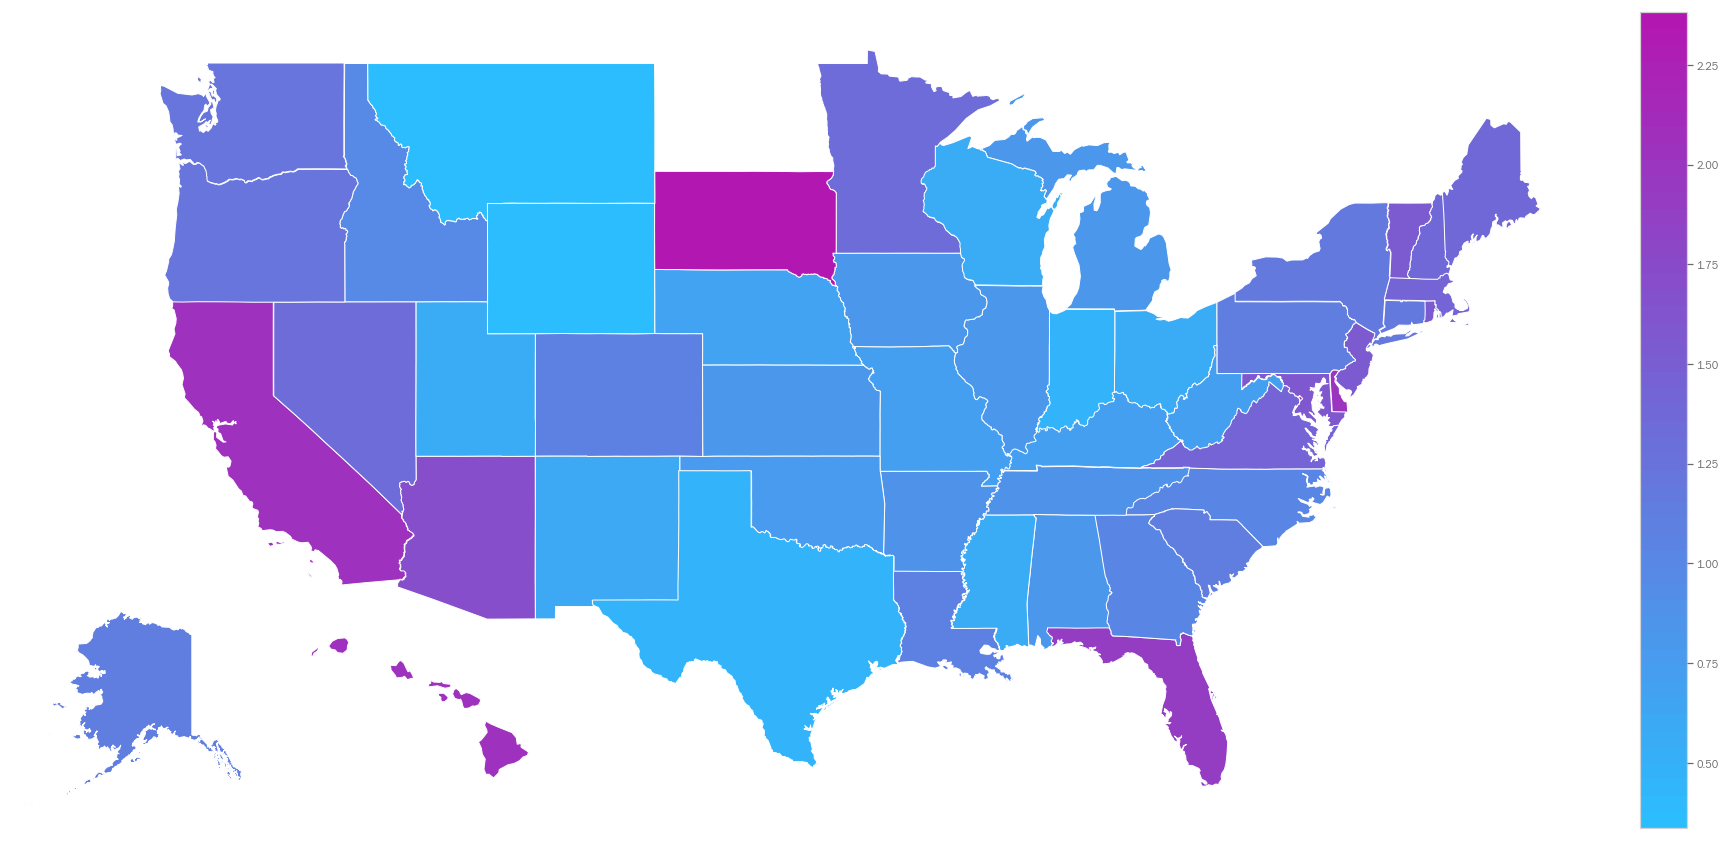

In [20]:
state_map('96-07%_mean',grad=CB91_Grad_BP,annot=False)

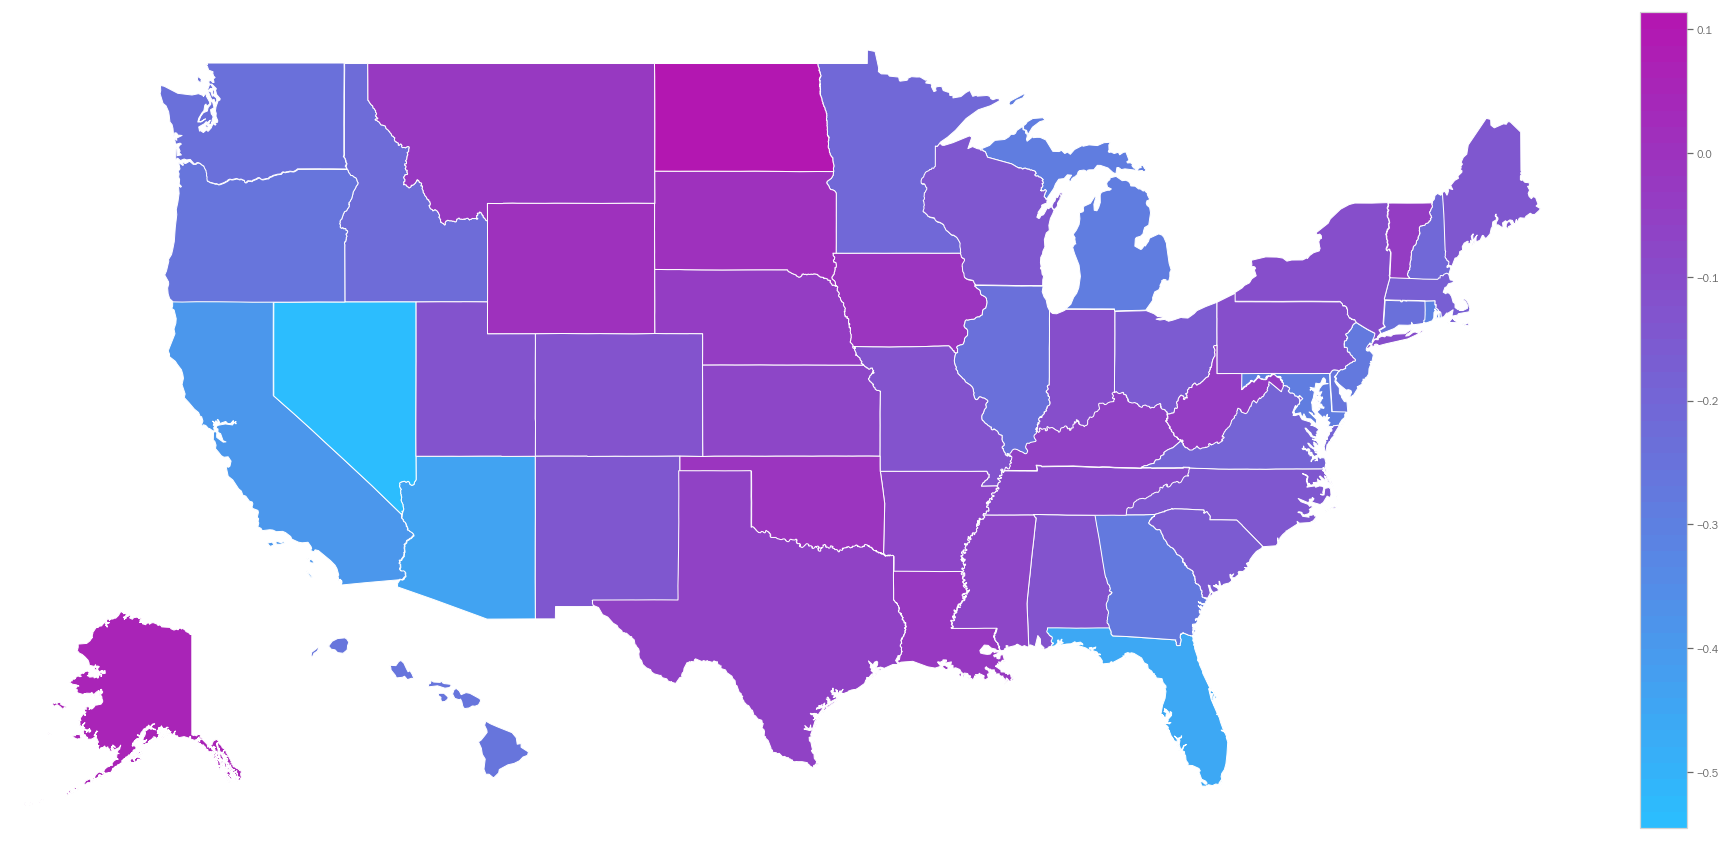

In [21]:
state_map('07-12%_mean',grad=CB91_Grad_BP,annot=False)

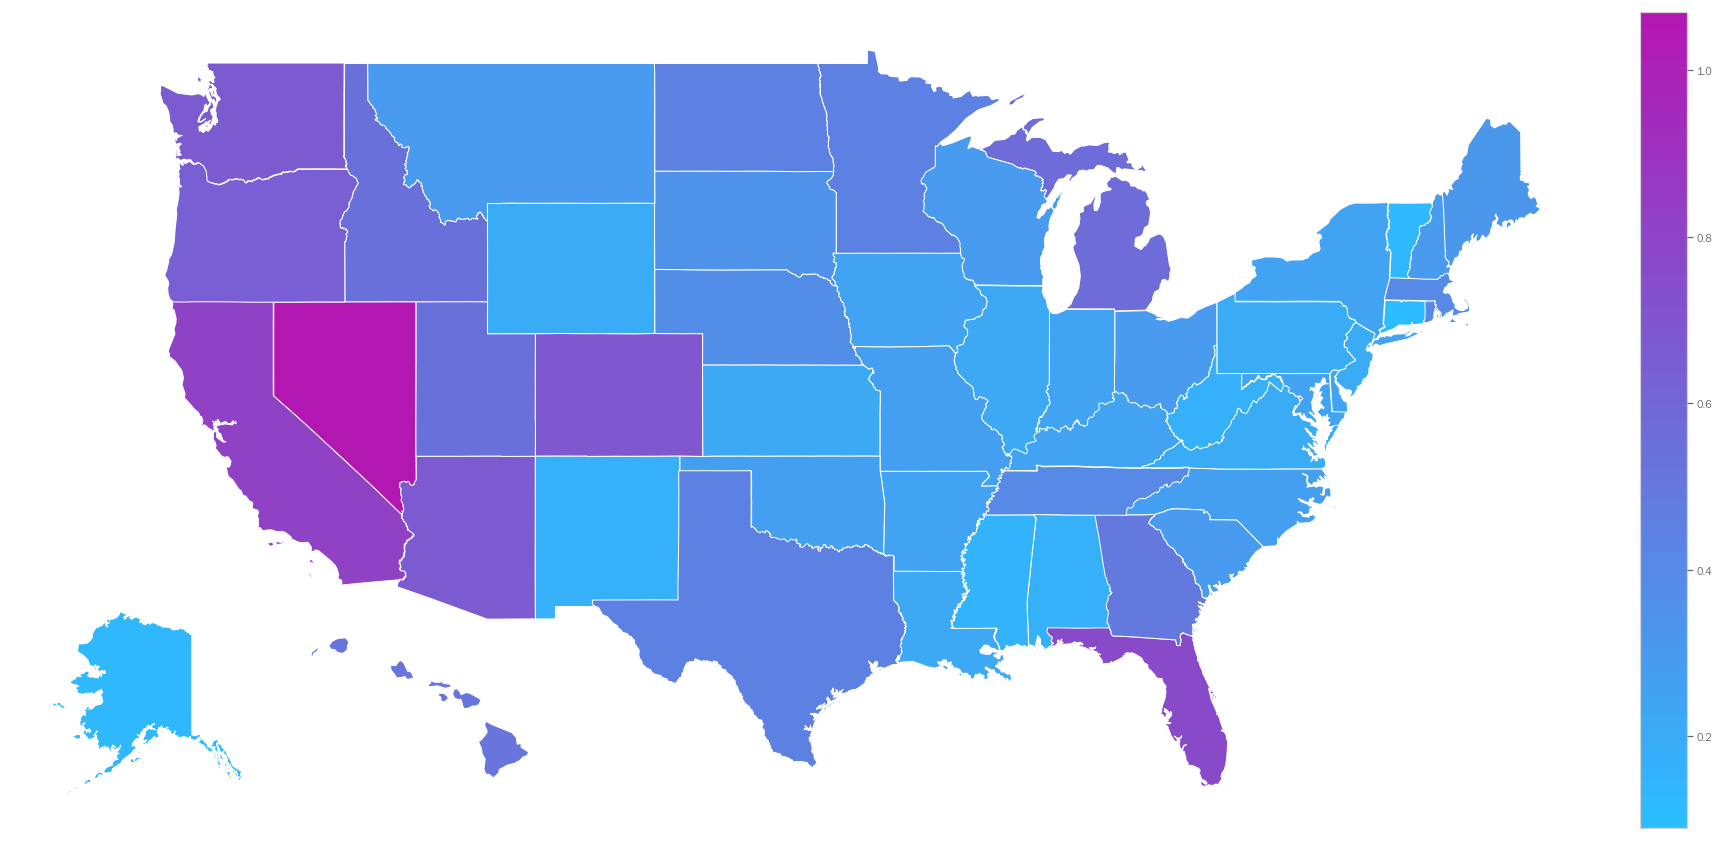

In [22]:
state_map('12-18%_mean',grad=CB91_Grad_BP,annot=False)

Within states, how does regional growth vary?

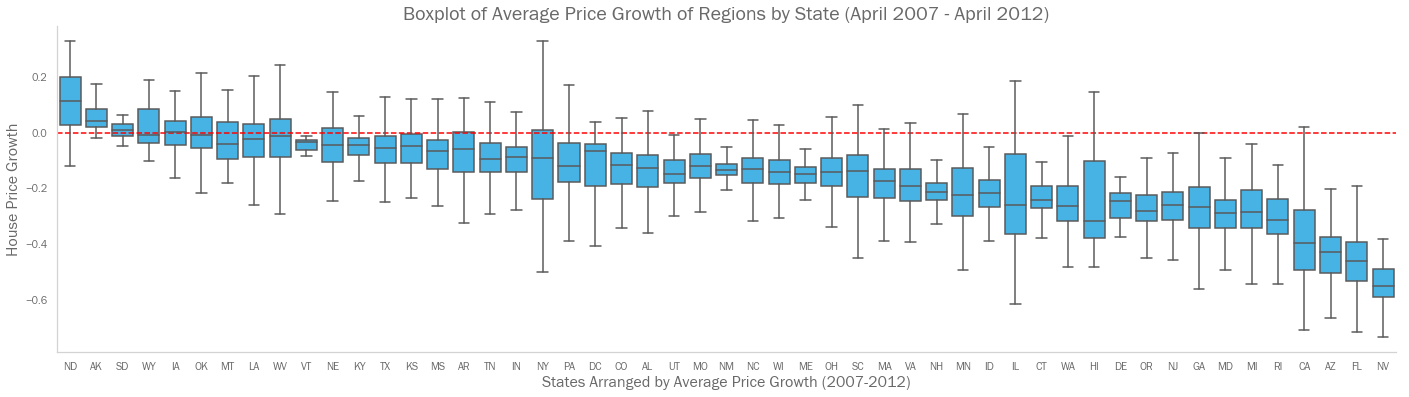

In [70]:
plt.figure(figsize=(24,6))

state_order = df_states['07-12%_mean'].sort_values(ascending=False).index

plt.axhline(0,color='red',ls="--")

sns.boxplot(x='State',y='07-12%',
            data=df_stats,order=state_order,
            showfliers=False, color = CB91_Amber)

plt.ylim();
plt.xlabel('States Arranged by Average Price Growth (2007-2012)')
plt.ylabel('House Price Growth')
plt.title('Boxplot of Average Price Growth of Regions by State \
(April 2007 - April 2012)');

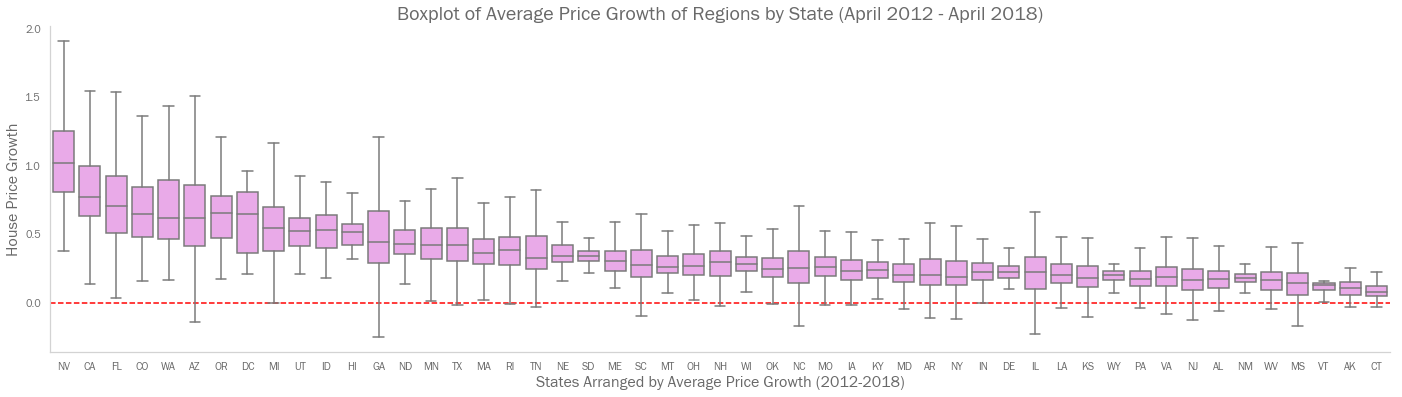

In [71]:
plt.figure(figsize=(24,6))

state_order = df_states['12-18%_mean'].sort_values(ascending=False).index

plt.axhline(0,color='red',ls="--")

sns.boxplot(x='State',y='12-18%',
            data=df_stats,order=state_order,
            showfliers=False, color = CB91_Pink)

plt.ylim();
plt.xlabel('States Arranged by Average Price Growth (2012-2018)')
plt.ylabel('House Price Growth')
plt.title('Boxplot of Average Price Growth of Regions by State \
(April 2012 - April 2018)');

So the inter-quartile range for most states is actually quite tight (certainly more so when considering the last six years) though most states have some strong outliers either way.

We can also visualise the region by region picture on a scatter, showing the growth since the recession on the x axis, and the fall during the recession on the y axis. We should consider focusing our analysis on regions that score well on each measure.

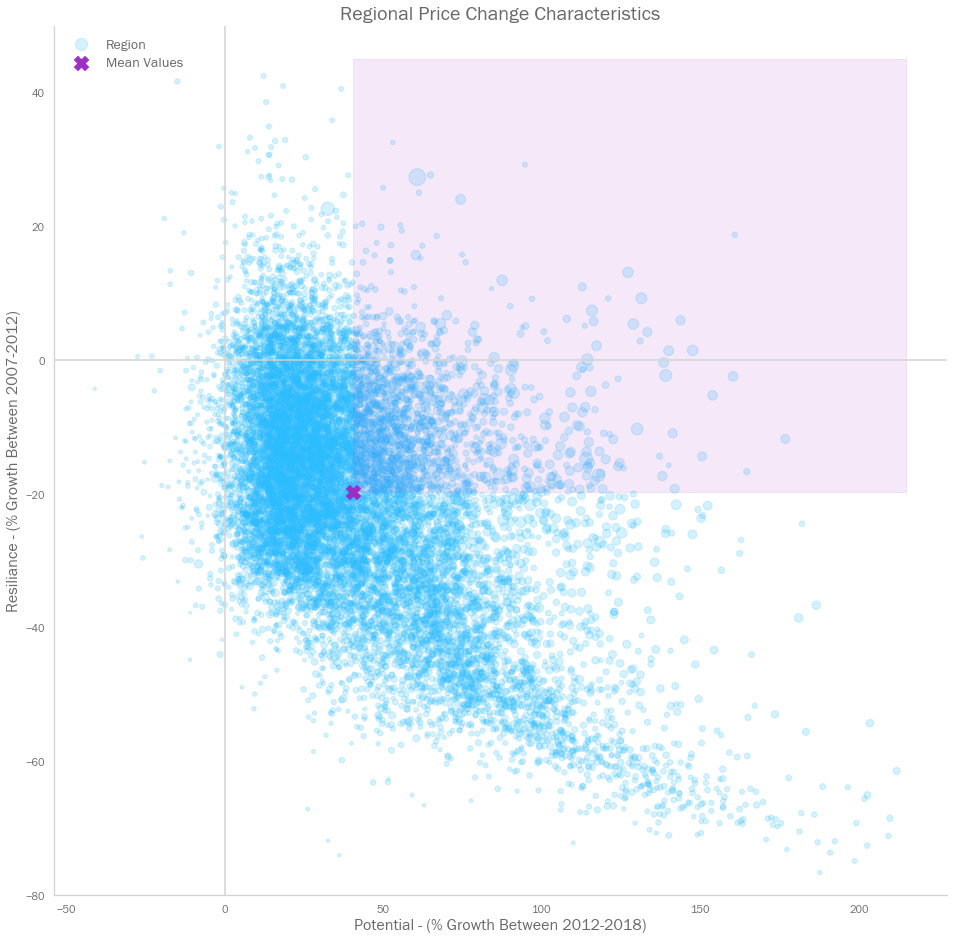

In [25]:
#translate the current house price values
#this will be used to size the points on the scatter
trans_values = np.sqrt(df_stats['Apr18'])/15

#calculate the average x and y values
avg_res = df_stats['07-12%'].mean()
avg_pot = df_stats['12-18%'].mean()

plt.figure(figsize=(16,16))

#plot the scatter
plt.scatter(df_stats['12-18%'] * 100, df_stats['07-12%'] * 100,
            s=trans_values, alpha=0.2, label='Region');

#and plot a point showing the average
plt.scatter(avg_pot * 100, avg_res * 100, s=200,
            color=CB91_Purple, marker='X', label='Mean Values');

#shade the region that is above both averages
plt.fill_between([avg_pot*100, 215], [avg_res*100, avg_res*100], [45,45],
        color=CB91_Purple, alpha=0.1)

plt.axhline(0,color='lightgrey')
plt.axvline(0,color='lightgrey')

plt.ylim(-80,50)

plt.legend(loc=2, frameon=False, fontsize=14)

plt.title('Regional Price Change Characteristics')
plt.xlabel('Potential - (% Growth Between 2012-2018)');
plt.ylabel('Resiliance - (% Growth Between 2007-2012)');

Let's suppose we'd had $100,000 to invest in property in 1996, then had the chance to sell at two points: once at the peak in 2007, and again at the trough in 2012. What is the most money we could have made? Similarly, what's the most we could have lost?

In [26]:
#Initiate an empty list for the regionIDs with extreme growth
extreme_codes = []

#Find the regions that had the biggest growth in each time period
extreme_codes.append(df_stats.sort_values(
    '96-07%').dropna().iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '07-12%').dropna().iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '12-18%').dropna().iloc[0]['RegionID'])

#And the regions that had the biggest falls
extreme_codes.append(df_stats.sort_values(
    '96-07%', ascending = False).dropna().iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '07-12%', ascending = False).dropna().iloc[0]['RegionID'])

extreme_codes.append(df_stats.sort_values(
    '12-18%', ascending = False).dropna().iloc[0]['RegionID'])

#Create a dataframe that looks at these regions
df_extreme = df.loc[df['RegionID'].isin(extreme_codes)]

#Create a new column of county name, state name, which we'll use as an index
df_extreme['Index'] = df_extreme["CountyName"].map(
    lambda x: f'{str(x)}, ') + df_extreme["State"]

df_extreme.set_index('Index', inplace=True)

#Transpose to create line plots
df_extreme = df_extreme.iloc[:,8:].T

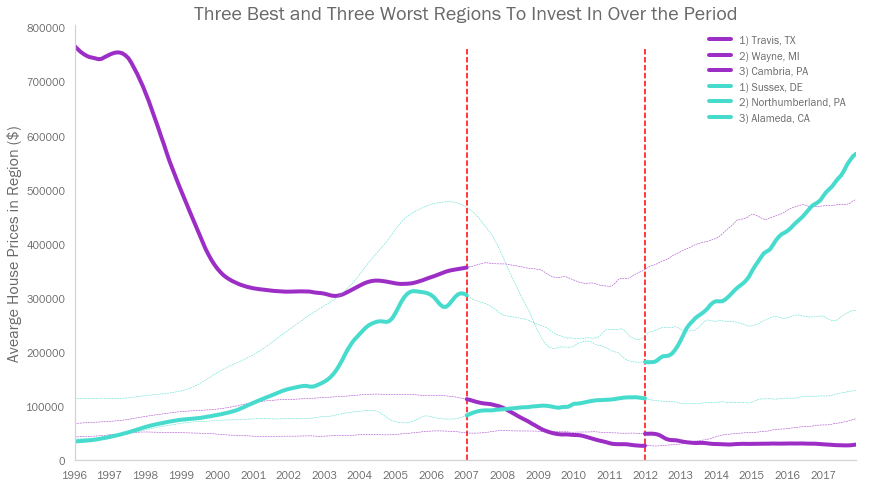

In [27]:
#Now plot the regions' prices over time...
plt.figure(figsize=(14,8))

x = df_extreme.index
x1 = df_extreme.index[:133]
x2 = df_extreme.index[132:193]
x3 = df_extreme.index[192:]


plt.plot(x, df_extreme['Travis, TX'], color = CB91_Purple,
         lw = 0.5, ls = '--', label = '')
plt.plot(x1, df_extreme['Travis, TX'][x1], color = CB91_Purple,
         lw = 4, label = '1) Travis, TX')

plt.plot(x, df_extreme['Wayne, MI'], color = CB91_Purple,
         lw = 0.5, ls = '--', label = '')
plt.plot(x2, df_extreme['Wayne, MI'][x2], color = CB91_Purple,
         lw = 4, label = '2) Wayne, MI')

plt.plot(x, df_extreme['Cambria, PA'], color = CB91_Purple,
         lw = 0.5, ls = '--', label = '')
plt.plot(x3, df_extreme['Cambria, PA'][x3], color = CB91_Purple,
         lw = 4, label = '3) Cambria, PA')

plt.plot(x, df_extreme['Sussex, DE'], color = CB91_Green,
         lw = 0.5, ls = '--', label = '')
plt.plot(x1, df_extreme['Sussex, DE'][x1], color = CB91_Green,
         lw = 4, label = '1) Sussex, DE')

plt.plot(x, df_extreme['Northumberland, PA'], color = CB91_Green,
         lw = 0.5, ls = '--', label = '')
plt.plot(x2, df_extreme['Northumberland, PA'][x2], color = CB91_Green,
         lw = 4, label = '2) Northumberland, PA')

plt.plot(x, df_extreme['Alameda, CA'], color = CB91_Green,
         lw = 0.5, ls = '--', label = '')
plt.plot(x3, df_extreme['Alameda, CA'][x3], color = CB91_Green,
         lw = 4, label = '3) Alameda, CA')

plt.vlines([x1[-1],x2[-1]],0,760000,color='red',linestyles='dashed')

plt.xticks([x[i] for i in range(len(df_extreme)) if i%12 == 0])

plt.xlim(x[0],x[-1]);
plt.ylim(0,);

plt.legend(frameon=False)

plt.title('Three Best and Three Worst Regions \
To Invest In Over the Period');
plt.ylabel('Avearge House Prices in Region ($)');

In [28]:
#First, take 100000 dollars, and iterate through the different growths
#we see for the best performing regions across the three time periods
value = 100000

values = [value]

for i in range(len(x1)-1):
    value = value * (df_extreme['Sussex, DE'][x1][i+1] /
                     df_extreme['Sussex, DE'][x1][i])
    values.append(value)

for i in range(len(x2)-1):
    value = value * (df_extreme['Northumberland, PA'][x2][i+1] /
                     df_extreme['Northumberland, PA'][x2][i])
    values.append(value)
    
for i in range(len(x3)-1):
    value = value * (df_extreme['Alameda, CA'][x3][i+1] /
                     df_extreme['Alameda, CA'][x3][i])
    values.append(value)
    
df_extreme['BestCase'] = values


#Then do the same for the three worst performing regions
value = 100000

values = [value]

for i in range(len(x1)-1):
    value = value * (df_extreme['Travis, TX'][x1][i+1] /
                     df_extreme['Travis, TX'][x1][i])
    values.append(value)

for i in range(len(x2)-1):
    value = value * (df_extreme['Wayne, MI'][x2][i+1] /
                     df_extreme['Wayne, MI'][x2][i])
    values.append(value)
    
for i in range(len(x3)-1):
    value = value * (df_extreme['Cambria, PA'][x3][i+1] /
                     df_extreme['Cambria, PA'][x3][i])
    values.append(value)
    
df_extreme['WorstCase'] = values

df_extreme.tail(3)[['BestCase','WorstCase']]

Index,BestCase,WorstCase
2018-02-01 00:00:00,3.690544e+06,6269.654491
2018-03-01 00:00:00,3.737091e+06,6405.459282
2018-04-01 00:00:00,3.768345e+06,6563.898204


So from the initial investment of 100k, we could end up having a portfolio worth anywhere between 6,000 and 4,000,000...

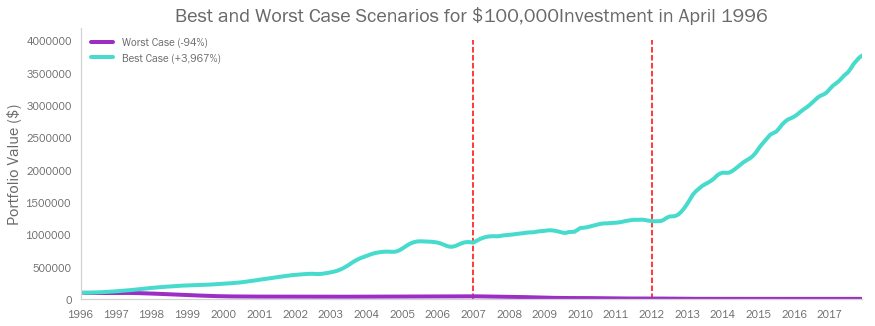

In [29]:
plt.figure(figsize=(14,5))

x = df_extreme.index

plt.plot(x, df_extreme['WorstCase'], color = CB91_Purple,
         label = 'Worst Case (-94%)', lw=4)

plt.plot(x, df_extreme['BestCase'], color = CB91_Green,
         label = 'Best Case (+3,967%)', lw=4)

plt.vlines([x1[-1],x2[-1]],0,4000000,color='red',linestyles='dashed')

plt.xlim(x[0],x[-1]);
plt.ylim(0,);

plt.xticks([x[i] for i in range(len(df_extreme)) if i%12 == 0])

plt.title('Best and Worst Case Scenarios for $100,000\
Investment in April 1996');
plt.ylabel('Portfolio Value ($)');
plt.legend(frameon=False);

Let's create a dataframe that isolates the regions that have both strong potential as highlighted in our scatter, and high resiliance - our 'Growth Regions'.

In [30]:
df_stats_growth = df_stats.loc[(df_stats['07-12%']>avg_res) &
                               (df_stats['12-18%']>avg_pot)]
growth_regions = list(df_stats_growth['RegionID'])

#Add a column to the original dataframe to see
#if the region is in the growth group or not
df['GrowthRegion'] = df['RegionID'].map(
    lambda x: 1 if x in growth_regions else 0)

cols = list(df.columns)
df = df[cols[:7] + [cols[-1]] + cols[7:-1]]

We create an indexed view of the house prices, by creating a function that takes a point in time, sets all prices at this point as 100, and calculates the relative house prices at other points in time.

In [31]:
def indexed_time_series(start,df=df,drop_na=True):
    
    '''
    Takes a point in time 'start', and returns a dataframe
    that indexes all house prices to this start time (which is indexed to 100) 
    '''
    
    start = pd.to_datetime(start, format='%Y-%m')
    new_df = df[['RegionID','State','GrowthRegion']]
    for i in df.columns[8:]:
        new_df[i] = 100 *(df[i] / df[start])
    
    #If drop_na is true, then drop all regions with any NAs
    if drop_na:
        new_df = new_df.dropna()
    
    return new_df

We index to April 2007, when prices peaked before the crash, and add new columns to the summary statistics table.

In [32]:
df_07_indexed = indexed_time_series('2007-04')

df_sum['Growth_Index'] = list(df_07_indexed.loc[df_07_indexed['RegionID'].isin(
    growth_regions)].median()[2:])

df_sum['Non_Growth_Index'] = list(df_07_indexed.loc[~df_07_indexed['RegionID'].isin(
    growth_regions)].median()[2:])

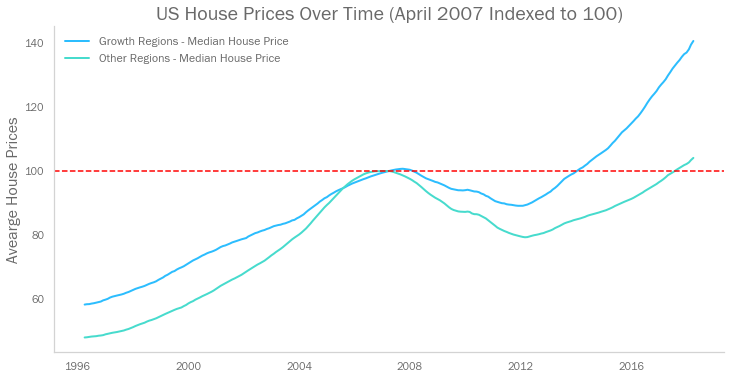

In [83]:
plt.figure(figsize=(12,6))

x = df_sum['index']

plt.plot(x, df_sum['Growth_Index'], lw = 2,
         label = 'Growth Regions - Median House Price')

plt.plot(x, df_sum['Non_Growth_Index'], lw = 2,
         label = 'Other Regions - Median House Price')

plt.axhline(100,color='red',ls="--")

plt.legend(fontsize=12, loc=2, frameon=False);

plt.title('US House Prices Over Time (April 2007 Indexed to 100)')
plt.ylabel("Avearge House Prices");

plt.xlim();

Unsurprisingly, the growth regions have shown much more growth since 2007.

Interestingly, they were also regions that grew less slowly in the preceeding years, suggesting that the regions have good fundamentals (other regions may have had their prices artificially boosted in the 90s/early 00s by the cheap credit that fuelled the crash in 2007).

Let's create an explicit dataframe of the growth regions.

In [34]:
df_growth = df.loc[df['GrowthRegion']==1]
df_growth.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,GrowthRegion,1996-04-01 00:00:00,1996-05-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1,235700.0,236900.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
5,91733,77084,Houston,TX,Houston,Harris,6,1,95000.0,95200.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
8,91940,77449,Katy,TX,Houston,Harris,9,1,95400.0,95600.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,1,766000.0,771100.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
10,62037,11226,New York,NY,New York,Kings,11,1,162000.0,162300.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200


What is the make-up of our growth regions?

Firstly, let's see if we have larger or smaller regions represented amongst the growth group.

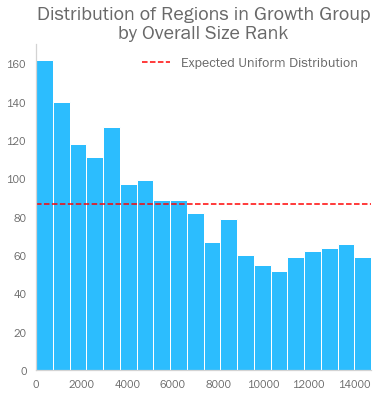

In [35]:
plt.figure(figsize=(6,6))
bins = 20
plt.hist(df_growth['SizeRank'], bins = bins)
plt.axhline(len(df_growth)/bins,color='red',
            ls="--",label='Expected Uniform Distribution');
plt.xlim(0,df_growth['SizeRank'].max())
plt.legend(frameon=False, fontsize=14)
plt.title('Distribution of Regions in Growth Group\nby Overall Size Rank');

Clearly, the growth group skews bigger (at least in terms of overall region size rank).

What about distribution by state?

In [36]:
#The number of growth regions in the state
df_states['GrowthRegions'] = df.groupby('State').sum()['GrowthRegion']

#The share of state regions that are growth regions
df_states['%GrowthRegions'] = df_states['GrowthRegions'] \
/ df_states['RegionCount']

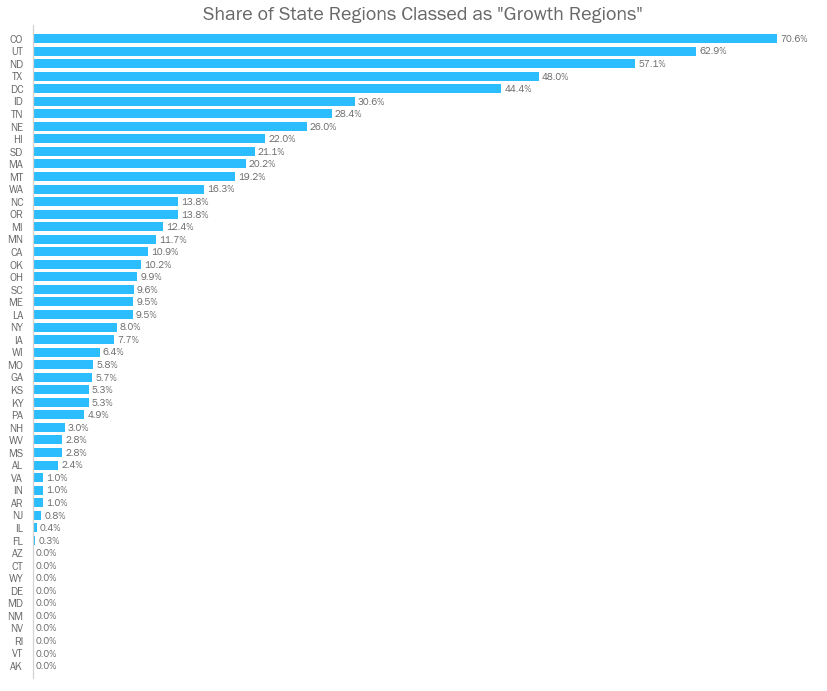

In [37]:
#Plot the share of state regions classed as growth regions
plt.figure(figsize=(14,12))

df_states_ordered = df_states.sort_values('%GrowthRegions')

plt.barh(df_states_ordered.index,df_states_ordered['%GrowthRegions'])

sns.despine(bottom=True)
plt.xticks([])
plt.ylim(-1,51)

plt.title('Share of State Regions Classed as "Growth Regions"')

for i, v in enumerate(df_states_ordered['%GrowthRegions']):
    plt.text(v+0.003, i - 0.25, f'{str(round(v*100,1))}%', fontsize = 10)

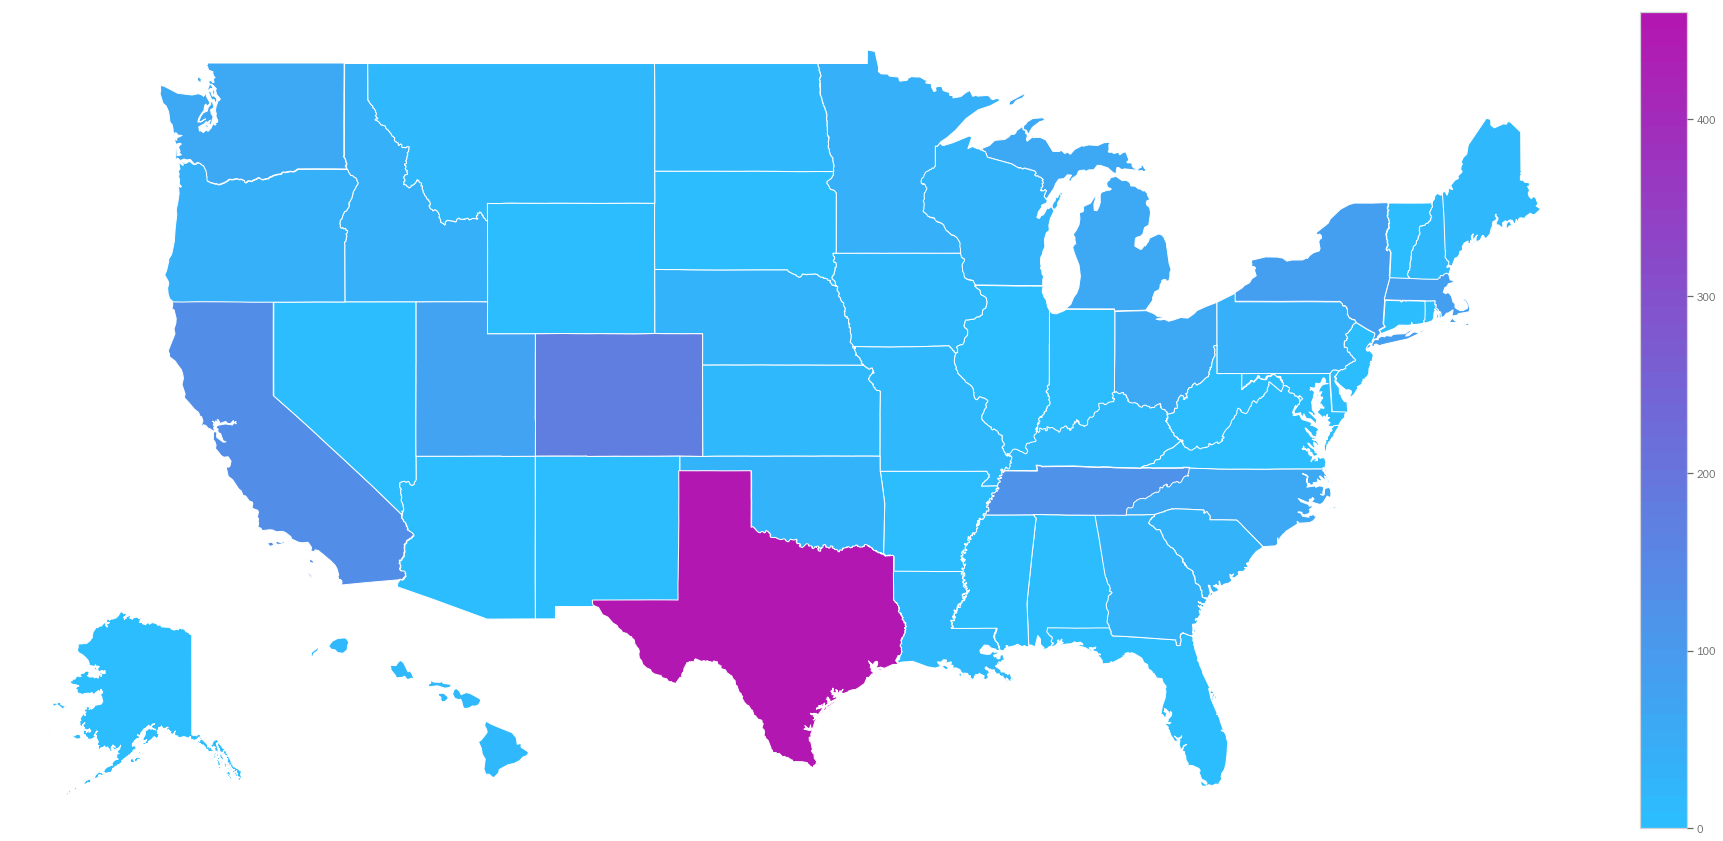

In [38]:
state_map('GrowthRegions',grad=CB91_Grad_BP,annot=False)

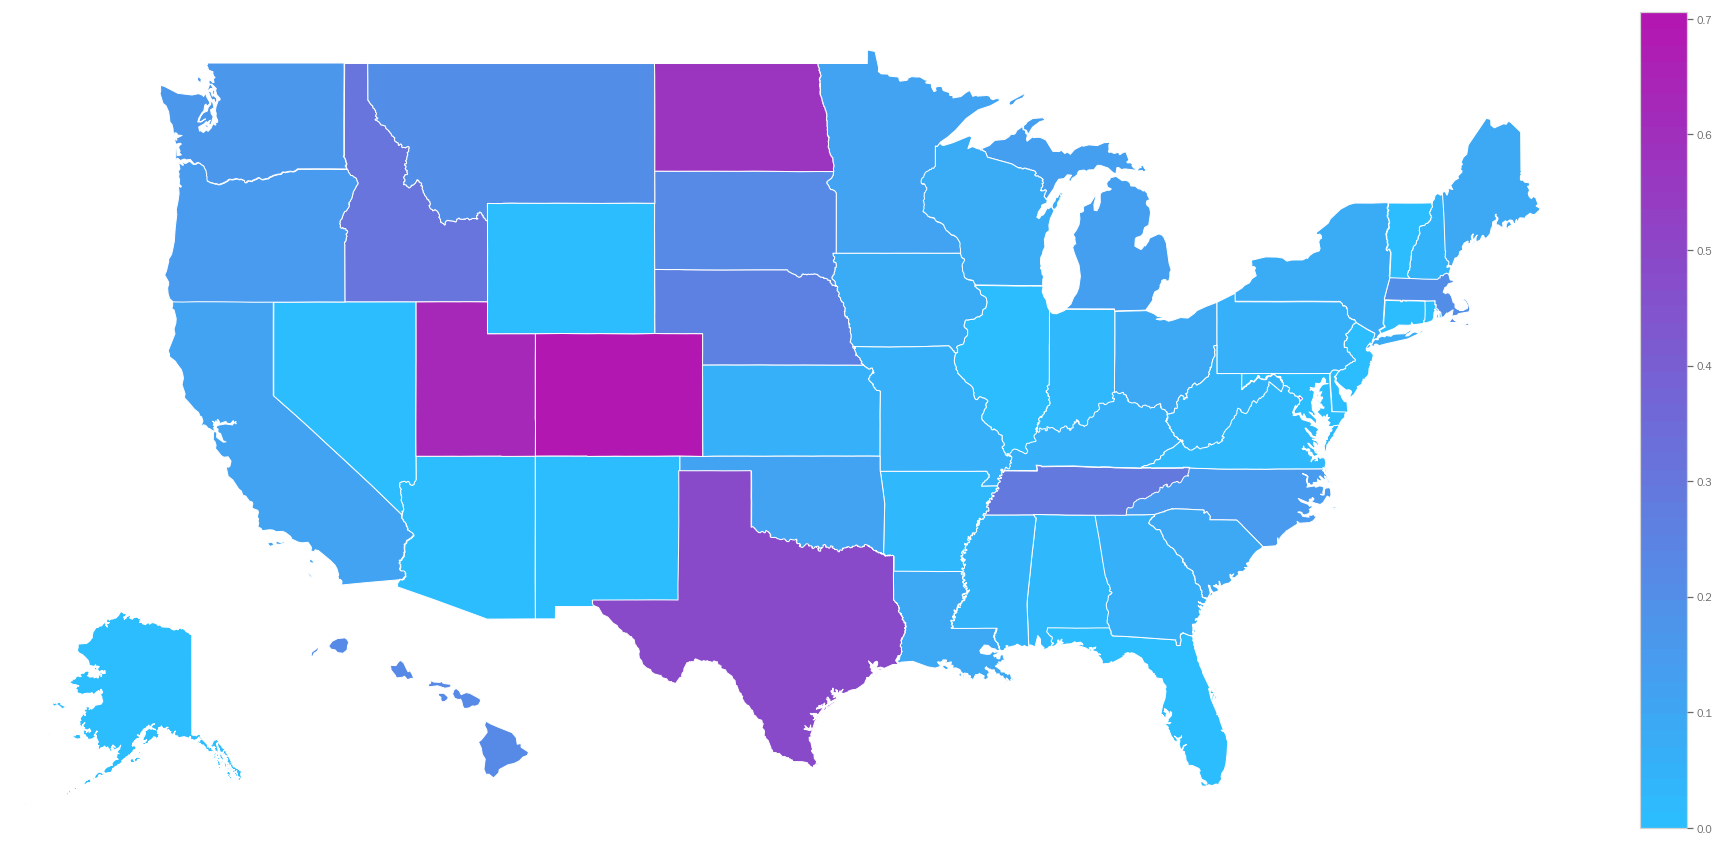

In [39]:
state_map('%GrowthRegions',grad=CB91_Grad_BP,annot=False)

## 4) Modelling
We now face the task of building model(s) to predict house prices. We have already seen that national trends can vary somewhat (e.g. state-by-state), so having a single nationwide model is unlikely to give us the nuance we need. We should instead aim to automate model building, which will iterate through regions, create bespoke growth models for each, and then predict future prices.

To help us, we also define a function 'ts_filter' that takes a region code list, and returns a time series dataframe featuring the house prices of those regions.

In [40]:
def ts_filter(regions, start = '1996-04', end = '2018-04', df = df):
    
    '''
    Takes a list of regions, a start date, and and end date,
    and returns a time series dataframe with a region given in each column
    
    Parameters:
    - regions (list): The regions we want to keep
    - start (str): The first date to include in the dataframe (pass as 'YYYY-MM')
    - end (str): The last date to include in the dataframe (pass as 'YYYY-MM')
    - df (pandas dataframe): The dataframe we want to use

    
    '''
    
    #Turn single entry into a list.
    #Allows user to enter a single regionID
    #if we just want to consider a single region
    if type(regions) != list:
        regions = [regions]
    
    #Change input dates to datetime objects
    start = pd.to_datetime(start, format='%Y-%m')
    end = pd.to_datetime(end, format='%Y-%m')
    
    #Create a new dataframe that filters regions,
    #and set the regionID to be the index
    df_temp = df.loc[df['RegionID'].isin(regions)]
    
    #We need to set the regionID to be a string
    #for the sake of the ARIMA modelling later
    df_temp['RegionID'] = df_temp['RegionID'].astype(str)
    df_temp.set_index(['RegionID'],inplace=True)

    #Find which columns the start and end dates represent in the dataframe
    columns = list(df_temp.columns)
    start_index = columns.index(start)
    end_index = columns.index(end)
    
    #Isolate the required dates in the dataframe
    #Transpose so that dates are the index
    df_temp = df_temp.iloc[:,start_index:end_index+1].T
    
    #We then need to reset the index, and set it back to the date
    #This ensures pandas treats the index elements as datetimes
    df_temp.reset_index(inplace=True)
    df_temp.set_index('index',inplace=True)
    
    return df_temp

When considering how exactly to model the time series data that we have, we should consider several attributes.

### Is the data stationary?

To be counted as stationary, we would require the mean to not be a function of time. The graphs that we have produced in the preivous sections certainly suggest that this is not the case, but we can run a Dickey-Fuller test to show this mathematically.

In [41]:
dftest = adfuller(df_sum['50%'])
dftest2 = adfuller(df_sum['50%'][192:])
print(f'p-value for all data = {round(dftest[1],3)}')
print(f'p-value for data from April 2012 = {dftest2[1]}')

p-value for all data = 0.587
p-value for data from April 2012 = 1.0


In [42]:
dftest = adfuller(df_sum['Mean'])
dftest2 = adfuller(df_sum['Mean'][192:])
print(f'p-value for all data = {round(dftest[1],3)}')
print(f'p-value for data from April 2012 = {round(dftest2[1],3)}')

p-value for all data = 0.34
p-value for data from April 2012 = 0.998


The test produces high p-values - especially for data from 2012 onwards. Thus we are not able to reject the hypothesis that our series aren't stationary (i.e. we can only conclude from these tests that our series has some sort of trend).

### Is the data seasonal?

We should check for seasonality in the dataset. This will inform what kind of modelling we need to do. Though visually, we don't see much in the way of seasonal trend, autocorrelation plots will confirm this.

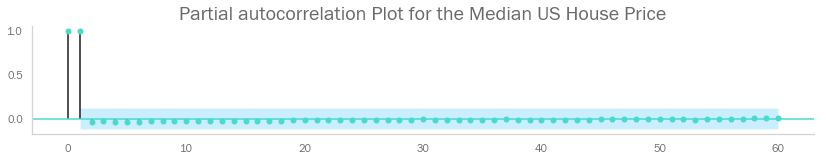

In [84]:
rcParams['figure.figsize'] = 14, 2
plot_pacf(df_sum['50%'], lags = 60, color=CB91_Green);
plt.title('Partial autocorrelation Plot for the Median US House Price');

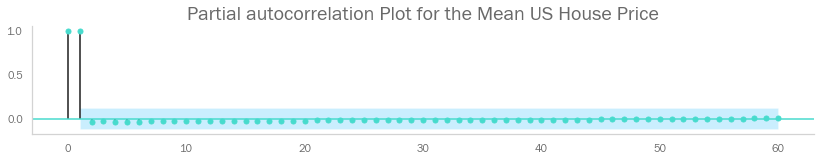

In [85]:
rcParams['figure.figsize'] = 14, 2
plot_pacf(df_sum['Mean'], lags = 60, color=CB91_Green);
plt.title('Partial autocorrelation Plot for the Mean US House Price');

It certainly seems that there's little to no seasonaility at play here - either for the median or the mean house price in the US. Thus, we have no need to use the full-blown SARIMAX model that accounts for seasonality.

### In conclusion...
We should use ARIMA models. The integrated term will deal with the trend we see from the Dickey Fuller test, but we do not need to go for a full SARIMAX model, since we do not observe seasonality. Deploying ARIMA also gives us flexibility in cases where the regional prices are stationary - it'll simply set the d-term to zero.

We define a series of functions, which will help us to iterate through a given number of regions, fit an ARIMA model to a test dataset, and return a series of statistics about each model.

In [45]:
#Define a standard series of parameters for the ARIMA model orders

p = q = d = [0,1,2]
d = [0,1]

combs = list(itertools.product(p,d,q))


def arima_selection(ts, combs=combs, split=0.9):
    
    '''
    Parameters
    - ts: The dataset that we want to fit to the model
    - Combs: The combinations of (p,d,q) that we want to consider
    - Split: The share of the dataset that we want to include in the train set
    
    Outputs:
    - The optimal (p,d,q) that minimises MSE on the test set
    - The fitted ARIMA model as an object
    '''
    
    #Calculate the index of the series that we'll use to do the train test split
    limit = int(len(ts) * split)
    
    #Create the train test series
    train = ts[:limit]
    test = ts[limit:]
    
    #Declare variables that we'll update and return later on
    rmse = None
    best_model = None
    best_order = None
    best_rmse = 10000000
    
    #Loop through the combinations...
    for i in combs:
        try:
            #Fit a model on the training set
            model = ARIMA(train,order=i)
            output = model.fit()
            #Predict forward the number equivalent to the length of the test set
            pred = output.forecast(len(test))[0]
            #Calculate the mean square error
            rmse = mean_squared_error(test, pred)**0.5
            
            #If we have a new best mse, then update the RMSE and model parameters
            if rmse < best_rmse:
                best_order = i
                best_rmse = rmse
                best_model = output

        except:
            continue
            
    if rmse == None:
        return None
    else:
        return best_order, best_model



def arima_forecast(output, periods):
    
    '''
    Parameters
    - output: A fitted statsmodel ARIMA model (as an object)
    - periods: The number of periods into the future that we want to forecast
    
    Outputs the fitted model as an object.
    Also outputs three series covering the number of
    periods set out in the parameters:
    1) the forecast
    2) lower bounds
    3) upper bounds
    '''

    #Calculate the forecast and isolate lower and upper bounds
    forecast = output.forecast(periods)
    lower = [i[0] for i in forecast[2]]
    upper = [i[1] for i in forecast[2]]

    return forecast[0], lower, upper



def arima_output(region, start='2012-04', periods = 120,
                 split = 0.9, combs = combs):
    
    '''
    Takes a region and produces a dataframe with a full output of statistics
    
    Parameters
    - region: The RegionID that we want to consider
    - start: The first date that we want to consider in the time series
    - periods: The number of periods into the future that we want to forecast
    - split: The share of the dataset that we want to include in the train set
    - combs: The combinations of (p,d,q) that we want to consider

    
    Outputs a one-row pandas dataframe with
    information about the ARIMA model for that region
    '''    
    
    ts = ts_filter(region,start=start)

    order, output = arima_selection(ts=ts, combs=combs, split=split)
    
    #Guard against cases where no model could be fit to the region's data
    if order == None:
        return None

    else:
        forecast, lower, upper = arima_forecast(output=output, periods=periods)

        state = df.loc[df['RegionID']==region]['State'].item()
        county = df.loc[df['RegionID']==region]['CountyName'].item()

        df_temp = pd.DataFrame({'RegionID':[region],
                                'County':[county],
                                'State':[state],
                                'Order':[order],
                                'FittedModel':[output],
                                'Forecast':[forecast],
                                'Lower':[lower],
                                'Upper':[upper]})

        return df_temp



def arima_dataframe(regions, start='2012-04',
                    periods = 120, split = 0.9, combs = combs):
    
    '''
    Takes a list of regions and and produces a
    dataframe with a full output of statistics
    
    Parameters
    - regions: A list of RegionIDs that we want to consider
    - start: The first date that we want to consider in the time series
    - periods: The number of periods into the future that we want to forecast
    - split: The share of the dataset that we want to include in the train set
    - combs: The combinations of (p,d,q) that we want to consider
    
    Outputs a pandas dataframe with information about
    the ARIMA model for each region in the list
    '''
    
    #Declare an empty dataframe
    df_temp = pd.DataFrame()
    
    #Iterate through the regions in the list and
    #get the stats from the arima_output function
    for i in regions:
        region_df = arima_output(i, start=start,
                                 periods=periods, split=split)
        df_temp = pd.concat([df_temp,region_df])
    
    return df_temp


Create ARIMA models for each region in our 'growth_regions' set, and put all the required outputs into a dataframe.

We comment this out, and re-load with pickle to ensure this doesn't get run each time.

In [46]:
#arima_df = arima_dataframe(growth_regions)

#with open('arima_df.pickle', 'wb') as f:
    #pickle.dump(arima_df, f, pickle.HIGHEST_PROTOCOL)

In [47]:
with open('data/arima_df.pickle', 'rb') as file:
    arima_df = pickle.load(file)

arima_df.reset_index(inplace=True, drop=True)
arima_df.head()

,RegionID,County,State,Order,FittedModel,Forecast,Lower,Upper
0,90668,Collin,TX,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[312143.40643119154, 314064.3150512036, 315783...","[311295.6384028486, 311722.3738888332, 311647....","[312991.17445953446, 316406.256213574, 319920...."
1,91733,Harris,TX,"(2, 0, 2)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[159747.67657177543, 160654.7091093458, 161428...","[159291.82129491118, 159377.0017145843, 159173...","[160203.5318486397, 161932.4165041073, 163683...."
2,91940,Harris,TX,"(1, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[168312.6330976554, 169293.82987167052, 170217...","[167829.78990906934, 168010.72145518934, 16795...","[168795.47628624146, 170576.9382881517, 172481..."
3,97564,San Francisco,CA,"(1, 0, 0)",<statsmodels.tsa.arima_model.ARMAResultsWrappe...,"[3763964.854690347, 3764029.6776224324, 376409...","[3695309.2818519226, 3666959.8050405267, 36452...","[3832620.427528771, 3861099.550204338, 3882951..."
4,62037,Kings,NY,"(0, 1, 0)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[855881.25, 860762.5, 865643.75, 870525.0, 875...","[841787.4753875756, 840830.8927980798, 841232....","[869975.0246124244, 880694.1072019202, 890054...."


Since we stored the models directly in the data frame, we can add columns by calling on the models' inbuilt function, for example their AICs, BICs, and parameter p values.

In [48]:
arima_df['ARParams'] = arima_df['FittedModel'].map(lambda x: x.arparams)
arima_df['MAParams'] = arima_df['FittedModel'].map(lambda x: x.maparams)

arima_df['ModelAIC'] = arima_df['FittedModel'].map(lambda x: x.aic)
arima_df['ModelBIC'] = arima_df['FittedModel'].map(lambda x: x.bic)

arima_df['Modelpvals'] = arima_df['FittedModel'].map(lambda x: x.pvalues)

We note that there are a couple of cases where we have not been able to fit a robust model. This has resulted in some NANs pulling through (e.g. where we can not calculate an aic). We should drop these regions - it would not be appropriate to give advice based on their results.

In [49]:
arima_df.dropna(inplace=True)

## 5) Interpreting Results
Let's unpack the forecasted values, and see which of our growth regions look like they'll provide us with the best returns over 5 years / 10 years.

In [50]:
arima_df['Abs5yGrowth'] = arima_df['Forecast'].map(lambda x: x[59] - x[0])
arima_df['%5yGrowth'] = arima_df['Forecast'].map(lambda x: x[59]/x[0] - 1)


arima_df['Abs10yGrowth'] = arima_df['Forecast'].map(lambda x: x[-1] - x[0])
arima_df['%10yGrowth'] = arima_df['Forecast'].map(lambda x: x[-1]/x[0] - 1)

arima_df.sort_values('%10yGrowth', ascending=False).head()

,RegionID,County,State,Order,FittedModel,Forecast,Lower,Upper,ARParams,MAParams,ModelAIC,ModelBIC,Modelpvals,Abs5yGrowth,%5yGrowth,Abs10yGrowth,%10yGrowth
697,91559,McLennan,TX,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[105085.16463331353, 106901.1734661564, 108747...","[104367.73632177095, 104989.71156263929, 10534...","[105802.59294485611, 108812.6353696735, 112154...","[1.9942938153586824, -0.9943231187118033]","[-0.5247542618419677, -0.4749444172715242]",954.827173,967.780472,const 0.122250 ar.L1.D.91559 ...,158176.647164,1.505223,416268.669026,3.961251
1111,93636,Pueblo,CO,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[175093.56282152238, 176050.004591286, 177070....","[174315.36467656653, 174066.62250669362, 17358...","[175871.76096647824, 178033.3866758784, 180557...","[1.998172978967835, -0.9982562280869269]","[-0.6538615273077499, -0.34613808266810625]",966.886500,979.839798,const NaN ar.L1.D.93636 ...,184659.581624,1.054634,692601.950925,3.955611
534,93024,Taylor,TX,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[103666.55164536668, 104669.46299205805, 10570...","[102985.0171392703, 102721.65165481692, 102162...","[104348.08615146305, 106617.27432929918, 10925...","[1.996450352572352, -0.9965002312455917]","[-0.31913000849885764, -0.6808695780517263]",949.603065,962.556364,const 8.283131e-02 ar.L1.D.93024 ...,126951.155822,1.224611,409965.252970,3.954653
1246,67605,Henrico,VA,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[207700.15958550357, 210464.26860853142, 21329...","[206566.1344282922, 207400.0451436887, 207820....","[208834.18474271495, 213528.49207337413, 21876...","[1.984523693502028, -0.9845767608187883]","[-0.4743004116739685, -0.5256972456083303]",1012.529304,1025.482603,const NaN ar.L1.D.67605 ...,249020.548360,1.198942,611791.729369,2.945553
16,90654,Dallas,TX,"(2, 1, 2)",<statsmodels.tsa.arima_model.ARIMAResultsWrapp...,"[189611.71227933312, 191063.59600190615, 19255...","[189110.25389139703, 189715.50103860276, 19014...","[190113.1706672692, 192411.69096520953, 194967...","[1.9979015641823878, -0.9980095996742788]","[-0.5024620673463988, -0.4975379323065289]",910.953709,923.907007,const NaN ar.L1.D.90654 ...,169097.895107,0.891811,548569.693383,2.893121


Let's check the distributions of the average growth rates forecasted by the models.

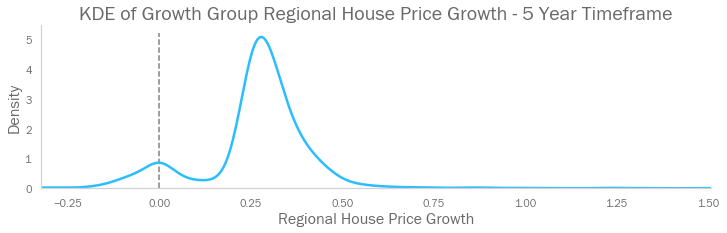

In [51]:
plt.figure(figsize=(12,3))
arima_df['%5yGrowth'].plot.kde(lw=2.5);
plt.vlines(0,0,5.2,color='grey',linestyles='dashed')

plt.xlim(arima_df['%5yGrowth'].min(),arima_df['%5yGrowth'].max())
plt.ylim(0,)

plt.title('KDE of Growth Group Regional House Price Growth - 5 Year Timeframe')
plt.xlabel('Regional House Price Growth');

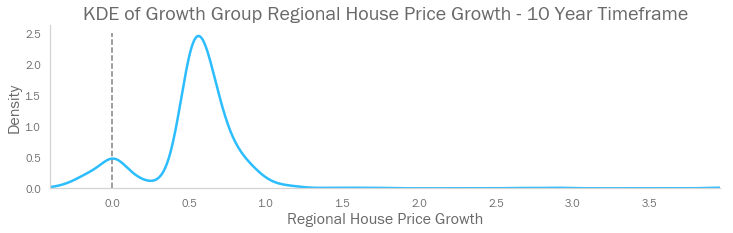

In [52]:
plt.figure(figsize=(12,3))
arima_df['%10yGrowth'].plot.kde(lw=2.5);
plt.vlines(0,0,2.5,color='grey',linestyles='dashed')

plt.xlim(arima_df['%10yGrowth'].min(),arima_df['%10yGrowth'].max())
plt.ylim(0,)

plt.title('KDE of Growth Group Regional House Price Growth - 10 Year Timeframe')
plt.xlabel('Regional House Price Growth');

So we can see that the majority of regions are likely to grow by between 25-30% in the next 5 years, and 50-60% in the next 10 years. There is a group of regions whose prices are forecast to be flat, and then a series of outliers either side, with some regions growing up to 400% over 10 years.

Let's write a function to graph a region's forecasted house price.

In [53]:
def plot_forecasts(regions, labels=None, plot_range=True,
                   start='2012-04', months=120, size=(16,8)):
    
    '''
    Takes a list of region codes, and plots their forcasted house prices.
    
    Parameters
    - regions (list): a list of regionIDs that we
                      want to plot (can be single integer)
    - labels (list): desired labels for the legend
                     (state code added automatically)
    - plot_range(bool): if True, will plot the forecast
                        range with 95% conf interval
    - start (str): The first date to include in
                   the dataframe (pass as 'YYYY-MM')
    - months (int): the number of months of forecast we want to show
    - size (int,int): the desired size of the plot
    
    '''
    #If we pass a single integer, put it in a list
    if type(regions) != list:
        regions = [regions]
    
    #Initiate a figure
    plt.figure(figsize=size)
    
    #Initiate a color counter
    counter=0
    
    #Iterate through each region and plot one by one
    for i in regions:
        #Find the non-forecasted part
        ts_real = ts_filter(i).iloc[:-8,:]
        x_real = list(ts_real.index)
        y_real = ts_real

        #Work out how much we need to extend the x axis for the forecasts
        x_forecast = pd.date_range('2017-09-01', periods=months, freq='MS')
        
        #Identify the region, and plot it using the color from color list
        region_i = arima_df.loc[arima_df['RegionID']==i]
        
        #Specify the label
        if labels == None:
            label = f"{region_i['County'].item()} County, {region_i['State'].item()}"
        else:
            label = f"{labels[counter]}, {region_i['State'].item()}"
        
        y_forecast = region_i['Forecast'].item()[:months]

        color = color_list[counter]
        
        plt.plot(x_real, y_real, color=color, label = label, lw = 3)
        plt.plot(x_forecast,y_forecast, color=color, ls='--', label = '', lw = 3)
        
        #If we are showing ranges, find and plot these
        if plot_range==True:
            y_lower = region_i['Lower'].item()[:months]
            y_upper = region_i['Upper'].item()[:months]
            plt.fill_between(x_forecast, y_lower, y_upper,
                 facecolor=color, alpha = 0.15, interpolate=True)
        
        counter += 1

    plt.title('Price Forecasts (Limits Given to 95% Confidence Interval)')
    plt.ylabel('Avearge House Prices in Region ($)');
    
    plt.xlim(pd.to_datetime('2012-04', format='%Y-%m'),x_forecast[-1])
    plt.ylim(0,)

    plt.legend(loc=2, fontsize=14, frameon=False);

There are some regions that are producing very uncertain forecasts, for example...

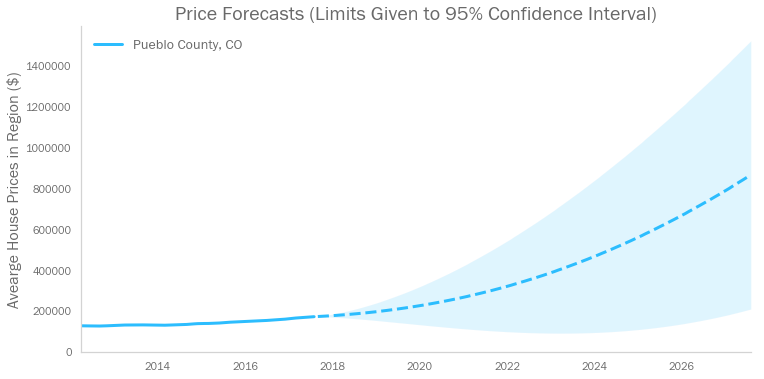

In [94]:
high_growth = list(arima_df.sort_values(
    '%10yGrowth',ascending=False)['RegionID'][:5])
plot_forecasts(high_growth[1], size=(12,6))

Let's create a column that calculates the width of the forecast 10 years ahead (as a percentage of the region's mean forecast). We can use this to start filtering out regions that we've evidently had a difficult time predicting.

In [55]:
def forecast_width(regionID):
    
    '''
    Takes a regionID and returns the difference between the forecast's
    upper and lower estimates (at 95% confidence intervals) as
    a percentage of the average forecast
    '''
    #Isolate the region
    region = arima_df.loc[arima_df['RegionID']==regionID]

    #Find the forecast and lower/upper limits for the last forecasted period
    y_forecast = region['Forecast'].item()[-1]
    y_lower = region['Lower'].item()[-1]
    y_upper = region['Upper'].item()[-1]
    
    return (y_upper - y_lower) / y_forecast

arima_df['ForecastWidth'] = arima_df['RegionID'].map(
    lambda x: forecast_width(x))

Let's plot these forecast widths against predicted price growths.

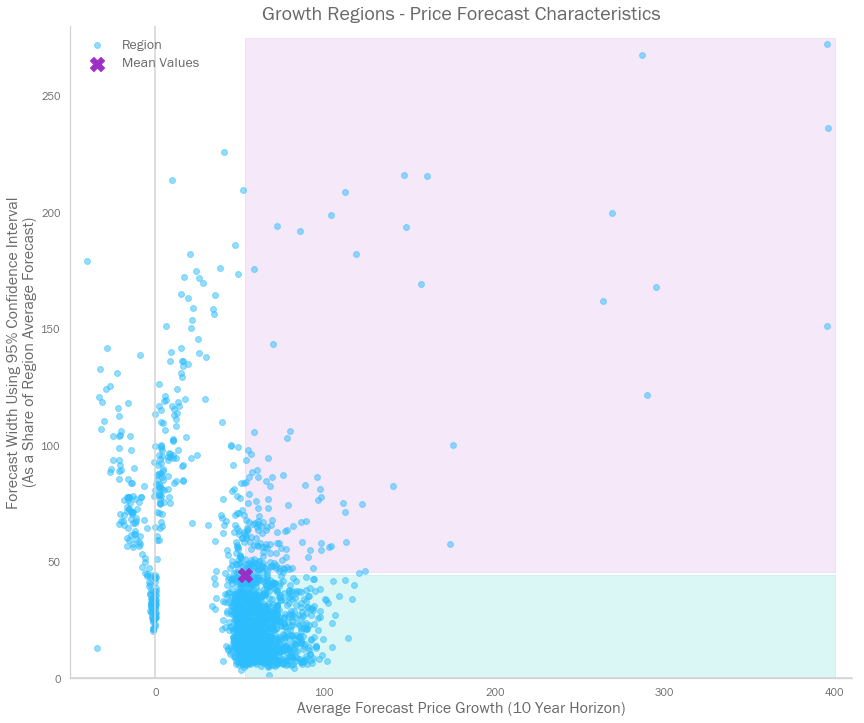

In [97]:
#calculate the average x and y values
avg_x = arima_df['%10yGrowth'].mean()
avg_y = arima_df['ForecastWidth'].mean()

plt.figure(figsize=(14,12))

# shade the region that is above both averages
plt.fill_between([avg_x*100, 400], [0,0], [avg_y*100, avg_y*100],
        color=CB91_Green, alpha=0.2)

plt.fill_between([avg_x*100, 400], [avg_y*100+1, avg_y*100+1], [275,275], 
        color=CB91_Purple, alpha=0.1)

#plot the scatter
plt.scatter(arima_df['%10yGrowth'] * 100, arima_df['ForecastWidth'] * 100,
            alpha=0.5, s=35, label='Region');

#and plot a point showing the average
plt.scatter(avg_x * 100, avg_y * 100, s=200,
            color=CB91_Purple, marker='X', label='Mean Values');

plt.axhline(0,color='lightgrey')
plt.axvline(0,color='lightgrey')

plt.ylim(0,280)
plt.xlim(-50,410)

plt.legend(loc=2, frameon=False, fontsize=14)

plt.title('Growth Regions - Price Forecast Characteristics')
plt.xlabel('Average Forecast Price Growth (10 Year Horizon)');
plt.ylabel('Forecast Width Using 95% Confidence Interval\
\n(As a Share of Region Average Forecast)');

We can immediately see that many of the regions we predicted would grow most also come with significant risk.

To help further shore up confidence in our forecasts, let's consider the p-values of the coefficients in each model. We can then filter out any regions where the p-values of the coefficients are not statistically significant.

In [57]:
def max_no_na(x):
    if len(list(x.dropna())) == 0:
        return None
    else:
        return max(list(x.dropna()))
    
arima_df['Maxpval'] = arima_df['Modelpvals'].map(lambda x: max_no_na(x))

Let's isolate the five regions that have the highest growth out of all the regions with a below-average forecast width. These should be the five regions that we recommend investing in.

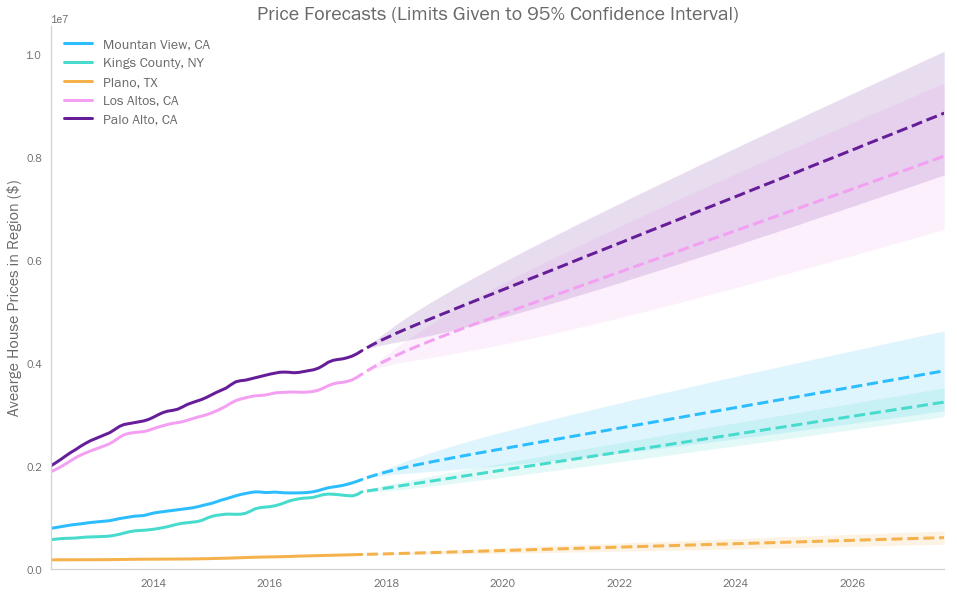

In [58]:
best_regions = list(arima_df.loc[(arima_df['%10yGrowth'] > avg_x) &
                                 (arima_df['ForecastWidth'] < avg_y) &
                                 (arima_df['Maxpval'] < 0.05)].sort_values(
    '%10yGrowth', ascending=False)['RegionID'][:5])

reg_labels = ['Mountan View', 'Kings County', 'Plano', 'Los Altos', 'Palo Alto']

plot_forecasts(best_regions, labels = reg_labels, size=(16,10))

Let's now create a pair of functions that calculates the return on investment for a portfolio of regions (assuming an equal split of cash between the regions).

In [59]:
def calc_returns(regions, investment=1000000):
    
    '''
    Takes a list of region codes, and plots the range of retuns that the portfolio
    could make assuming that funds were split evenly between regions.
    
    Parameters
    - regions: a list of regionIDs that we want to plot (can be single integer)
    - investment: the amount of money we invest up front
    - months (int): the number of months of forecast we want to show
    - size (int,int): the desired size of the plot
    
    '''
    #If we pass a single integer, put it in a list
    if type(regions) != list:
        regions = [regions]
        
    #Initiate three lists that will hold the returns    
    forecast = np.zeros(120)
    lower = np.zeros(120)
    upper = np.zeros(120)
    
    #Iterate through the regions and work out how
    #much they'll add to the portfolio over time
    for i in regions:
        #Identify the region
        region_i = arima_df.loc[arima_df['RegionID']==i]
        
        #And find the predicted prices at each point
        y_forecast = region_i['Forecast'].item()
        y_lower = region_i['Lower'].item()
        y_upper = region_i['Upper'].item()
        
        #Initiate three lists that will hold the returns for the ith region
        forecast_i = [investment/len(regions)]
        lower_i = [investment/len(regions)]
        upper_i = [investment/len(regions)]
        
        #Iterate through the forecast values
        for j in range(len(y_forecast)-1):
            #Calculate the growth rate, and multiply by the
            #previously calculated value of the forecast
            forecast_j = (y_forecast[j+1]/y_forecast[j]) * forecast_i[j]
            forecast_i.append(forecast_j)
            
            lower_j = (y_lower[j+1]/y_lower[j]) * lower_i[j]
            lower_i.append(lower_j)
            
            upper_j = (y_upper[j+1]/y_upper[j]) * upper_i[j]
            upper_i.append(upper_j)
            
        #Coerce the lists to numpy arrays, and add to the total amounts
        forecast += np.array(forecast_i)
        lower += np.array(lower_i)
        upper += np.array(upper_i)
        
    #Create a dataframe with all of this...
    index = pd.date_range('2017-09-01', periods=120, freq='MS')
    df_temp = pd.DataFrame({'Lower':lower,
                           'Forecast':forecast,
                           'Upper':upper}, index=index)
    
    return df_temp



def plot_returns(region_lists, labels, investment=1000000,
                 months=120, size=(16,8), y_min=0):
    
    '''
    Takes a list of region codes, and plots the range of retuns that the portfolio
    could make assuming that funds were split evenly between regions.
    
    Parameters
    - regions: a list of regionIDs that we want to plot (can be single integer)
    - labels: a list of 
    - investment: the amount of money we invest up front
    - months (int): the number of months of forecast we want to show
    - size (int,int): the desired size of the plot
    - y_min (float): the minimum for the y-axis in case we want to magnify the plot
    
    '''
    
    #Check if we have a list of lists, or just a single list
    if type(region_lists[0]) != list:
        region_lists = [region_lists]
        labels = [labels]

    #Initiate a figure
    plt.figure(figsize=size)
    
    #Initiate a counter for the labels and colors
    counter=0
    
    for i in region_lists:
        #Create the potential returns dataframe
        df_temp = calc_returns(i, investment=investment)

        #Identify the region, and plot it using the color from color list
        x = df_temp.index
        forecast = df_temp['Forecast']
        lower = df_temp['Lower']
        upper = df_temp['Upper']
        
        color = color_list[counter]
        label = labels[counter]
        
        plt.plot(x, forecast, color=color, lw=3, label=label)

        plt.fill_between(x, lower, upper, color=color,
                         alpha=0.3, interpolate=True)
        
        counter += 2

    plt.axhline(investment,color='red',ls="--")

    plt.title('Price Forecasts (Limits Given to 95% Confidence Interval)')
    plt.legend(loc=2, frameon=False, fontsize=14)

    plt.xlim(x[0],x[-1])
    plt.ylim(y_min,)
    

Plotting the returns from our five recommended regions, we see that they give a solid return, even in the worst case scenario.

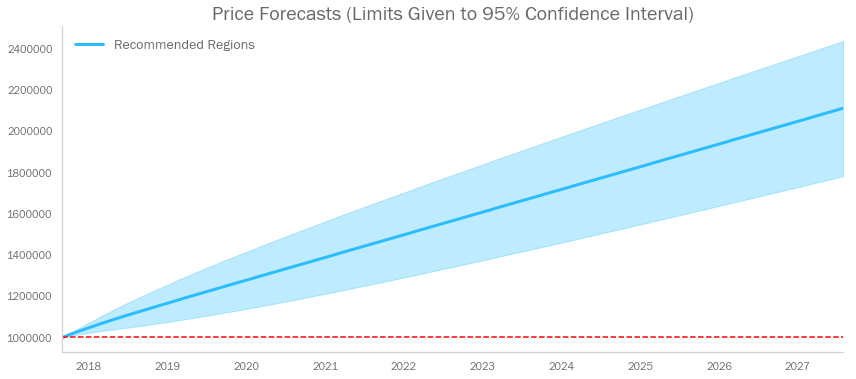

In [60]:
plot_returns(best_regions,'Recommended Regions', y_min=None, size=(14,6))

This becomes especially stark if we compare the recommended portfolio against the portfolio of those regions that simply have the fastest forecasted growth.

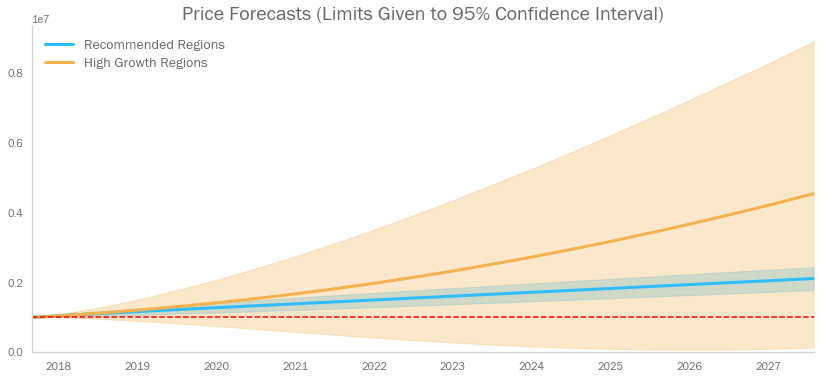

In [61]:
plot_returns([best_regions,high_growth],
             ['Recommended Regions','','High Growth Regions'],
             size=(14,6), y_min=0)

We see that although the projected returns for the high-growth regions is stronger, it is possible that a lot of value would be lost. Thus, it would be a risky investment. Note how narrow the blue 'recommended' regions forecast is in comparison.

## 6) Conclusion
The 5 regions that we would recommend to an investment client are given in the below dataframe. These regions have been selected by the following criteria:

- Above-average growth from 2007 to 2012. This suggests that the regions have good fundamental, underlying attributes, and are less succeptable to economic shocks (and that growth observed in other periods were not down to loose, sub-prime credit).
- Above-average growth from 2012 to 2018. This implies that the regions have strong potential to grow well during economic upturns as well.
- Strong forecast growth for the next 10 years.
- A reliable forecast (i.e. we were able to fit models that had statistically significant coefficients, and low ranges within a 95% confidence interval.

In [62]:
df.loc[df['RegionID'].isin(best_regions)]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,GrowthRegion,1996-04-01 00:00:00,1996-05-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
475,62027,11216,New York,NY,New York,Kings,476,1,146100.0,146600.0,...,1452000,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700
1892,90671,75075,Plano,TX,Dallas-Fort Worth,Collin,1893,1,151600.0,151200.0,...,286000,288400,291200,293600,295200,296800,299000,302200,305300,306400
2580,97530,94043,Mountain View,CA,San Jose,Santa Clara,2581,1,291700.0,294000.0,...,1709400,1745300,1779800,1812000,1847800,1881900,1915700,1965600,2031800,2074900
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,1,709500.0,711900.0,...,4188300,4247600,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400
5843,97513,94022,Los Altos,CA,San Jose,Santa Clara,5844,1,795600.0,798400.0,...,3730400,3793300,3866800,3951900,4045200,4118000,4170500,4235700,4321900,4372600


The expected returns from investing $1m in this portfolio are given as:

In [63]:
calc_returns(best_regions).tail()

,Lower,Forecast,Upper
2027-04-01,1.751794e+06,2.075573e+06,2.395650e+06
2027-05-01,1.759462e+06,2.084743e+06,2.406307e+06
2027-06-01,1.767136e+06,2.093914e+06,2.416956e+06
2027-07-01,1.774818e+06,2.103084e+06,2.427599e+06
2027-08-01,1.782506e+06,2.112255e+06,2.438235e+06
